<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-dataset" data-toc-modified-id="Loading-dataset-1">Loading dataset</a></span></li><li><span><a href="#Labels" data-toc-modified-id="Labels-2">Labels</a></span><ul class="toc-item"><li><span><a href="#tumor-ids" data-toc-modified-id="tumor-ids-2.1">tumor ids</a></span></li><li><span><a href="#tumor-class-size" data-toc-modified-id="tumor-class-size-2.2">tumor class size</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-3">Correlations</a></span><ul class="toc-item"><li><span><a href="#heatmap" data-toc-modified-id="heatmap-3.1">heatmap</a></span></li><li><span><a href="#pairwise-correlations-and-p-values" data-toc-modified-id="pairwise-correlations-and-p-values-3.2">pairwise correlations and p-values</a></span></li><li><span><a href="#hierarchical-clustering-on-correlation" data-toc-modified-id="hierarchical-clustering-on-correlation-3.3">hierarchical clustering on correlation</a></span></li></ul></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-4">Distributions</a></span><ul class="toc-item"><li><span><a href="#pre-process-features" data-toc-modified-id="pre-process-features-4.1">pre-process features</a></span></li><li><span><a href="#KS-test:-resistant-VS-non-res" data-toc-modified-id="KS-test:-resistant-VS-non-res-4.2">KS test: resistant VS non-res</a></span></li><li><span><a href="#t-test:-resistant-VS-non-res" data-toc-modified-id="t-test:-resistant-VS-non-res-4.3">t-test: resistant VS non-res</a></span></li><li><span><a href="#plot-relevant-differences" data-toc-modified-id="plot-relevant-differences-4.4">plot relevant differences</a></span></li></ul></li></ul></div>

<center>
    <big>
        <b>
        Exploratory analysis on ovarian cancer dataset
        </b>
    </big>
</center>

In [2]:
import pandas as pd
import numpy as np

# modules for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
inline_rc = plt.rcParams
# this module is needed for 3D plot
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# modules for stats
from scipy import stats
import powerlaw 
import itertools as itt

# module to save space
import gc

In [40]:
# resetting initial rc plotting parameters 
mpl.rcParams.update(inline_rc)

In [2]:
# command to INCREASE THE OUTPUT LENGTH
# pd.options.display.max_seq_items = 1000

# Loading dataset

In [61]:
ovarian_df = pd.read_excel('./ovarian_dataset_gianr.xlsx',sheet_name='main_dataset')

print(ovarian_df.shape)

ovarian_df.head()

(61, 129)


,Tumor,tumor_type,PFS days,PFS months,OS days,OS months,Total num,CD45,Lympho,Non immune,...,ABCC1.1,b-cat,BCMA,CD163,CXCL11,E-cad,HCCb,IL-6,MIP1B,Nanog
0,8,super_sensitive,NaN,NaN,NaN,NaN,10135.0,6.9,2.1,88.9,...,9.23,3.85,9.28,5.07,6.53,5.97,7.93,8.18,6.97,8.71
1,12,super_sensitive,NaN,NaN,NaN,NaN,29180.0,58.0,44.0,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,super_sensitive,NaN,NaN,NaN,NaN,25517.0,43.5,30.2,47.7,...,8.96,5.01,12.06,5.85,5.78,4.58,10.80,9.32,7.23,10.99
3,20,super_sensitive,NaN,NaN,NaN,NaN,29811.0,0.3,0.1,99.2,...,7.62,3.69,13.10,6.52,8.92,2.55,6.03,9.31,8.37,7.78
4,27,super_sensitive,NaN,NaN,NaN,NaN,18647.0,55.6,40.2,38.4,...,9.98,2.53,7.52,4.52,3.39,4.03,2.42,4.59,4.18,2.65


these are the only _non-float_ columns, that there the 'y' (namely the tumor class) and the patient ID:

In [5]:
ovarian_df.dtypes[ovarian_df.dtypes!='float64']

Tumor         object
tumor_type    object
dtype: object

...indeed, all the others are `float64`:

In [6]:
print(ovarian_df.shape)
sum(ovarian_df.dtypes=='float64')

(61, 129)


127

global data transformation

In [7]:
# set tumor id to STRING
ovarian_df.Tumor = ovarian_df.Tumor.astype(str);

# change 'Tumor' --> 'patient':
ovarian_df.rename(columns={'Tumor':'patient'},inplace=True) 

N non-nulls 

In [8]:
ovarian_df.notnull().sum().value_counts()

16    45
40    21
38    13
15    11
51     9
49     4
39     4
13     3
37     3
61     2
10     2
7      2
20     2
48     2
36     1
14     1
42     1
12     1
9      1
31     1
dtype: int64

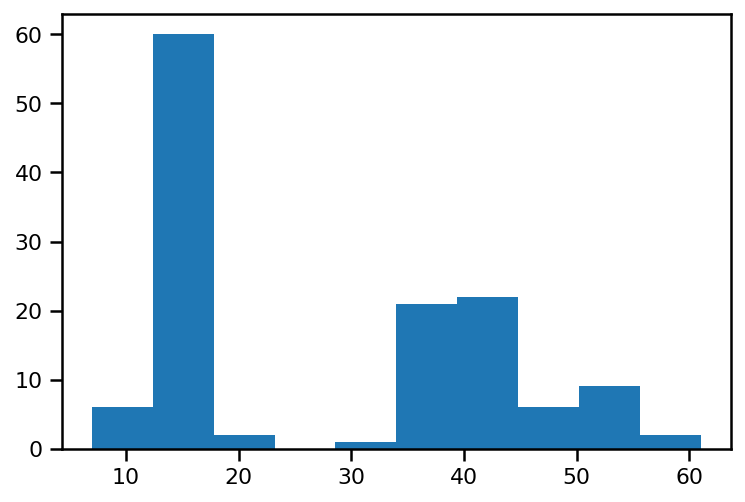

In [9]:
plt.hist(ovarian_df.notnull().sum());

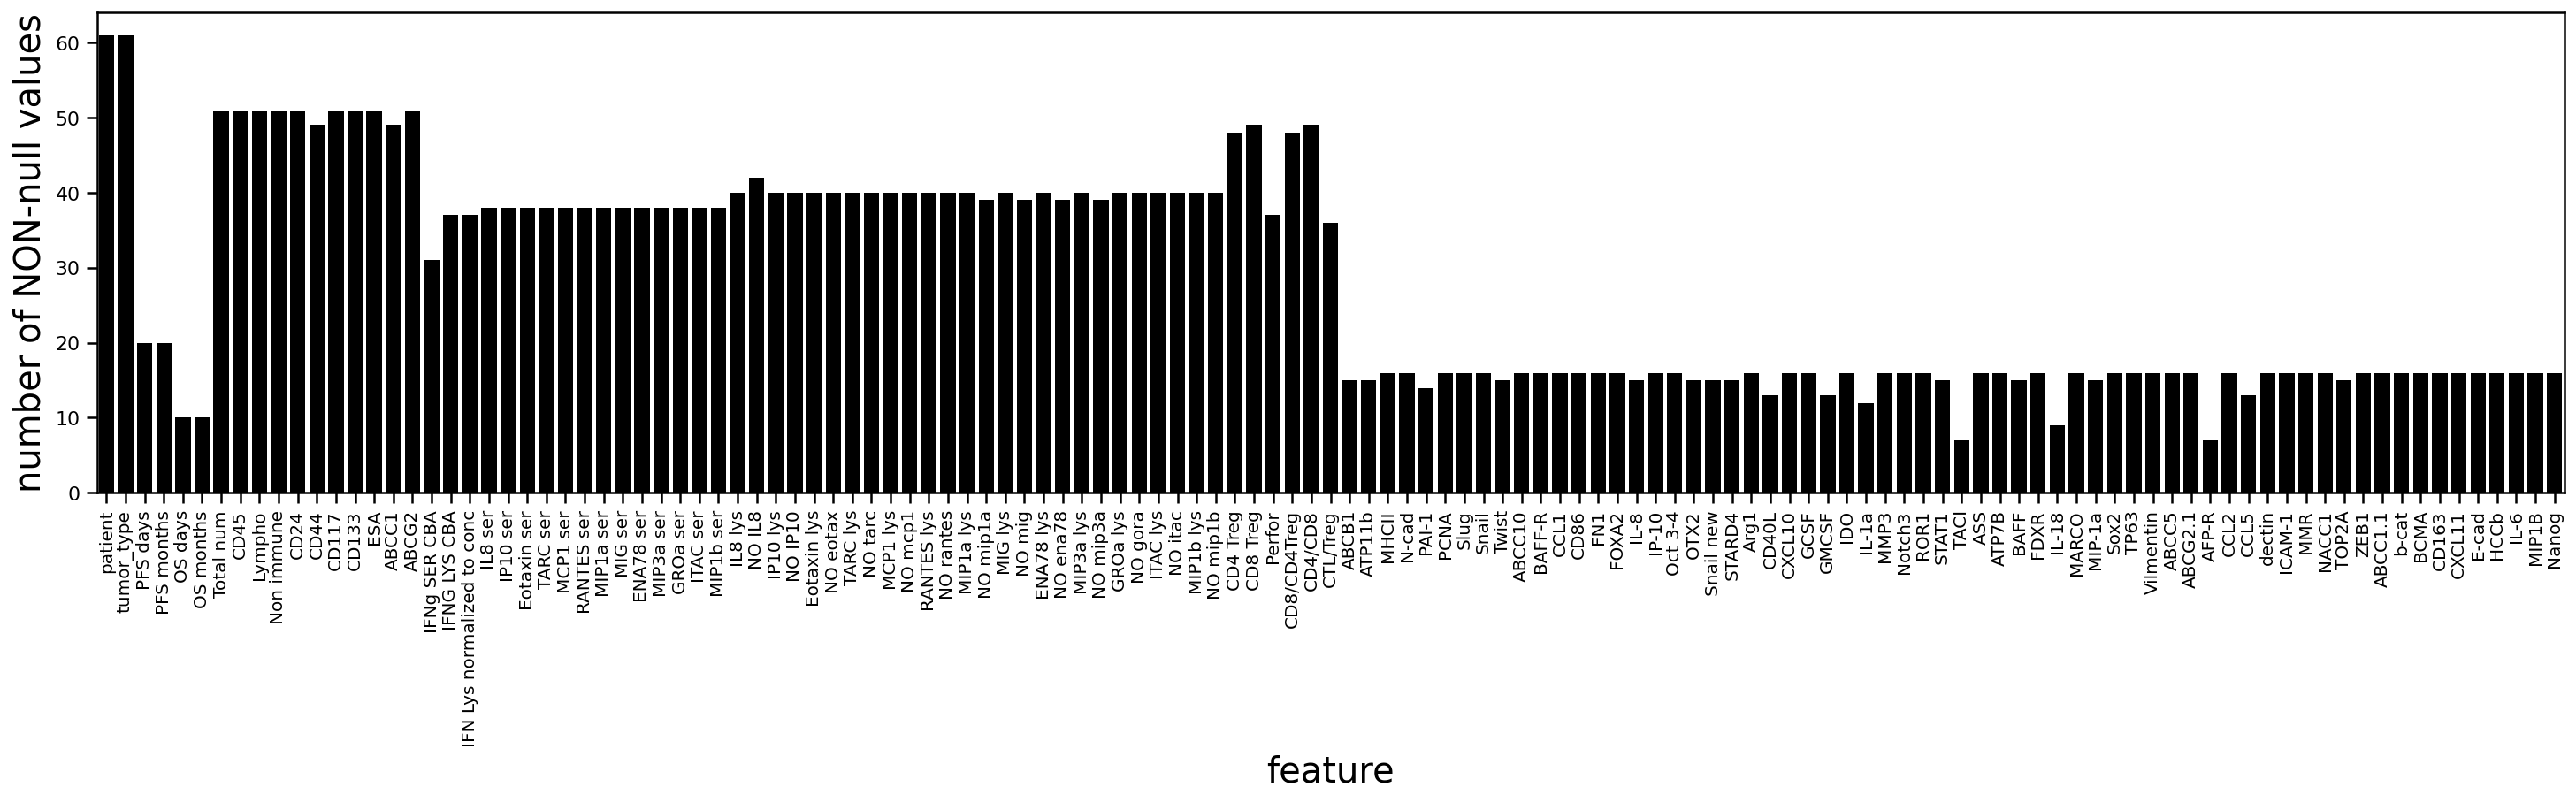

In [10]:
plt.rcParams["figure.figsize"] = [25,5]

sns.barplot(x=ovarian_df.notnull().sum().keys(),
            y=ovarian_df.notnull().sum().values,color='k');

plt.xticks(size=10,rotation=90)



plt.ylabel('number of NON-null values',size=20)
plt.xlabel('feature',size=20);

# Labels

## tumor ids

 tumor IDs _are unique_

In [11]:
ovarian_df.patient.nunique()==ovarian_df.shape[0]

True

## tumor class size

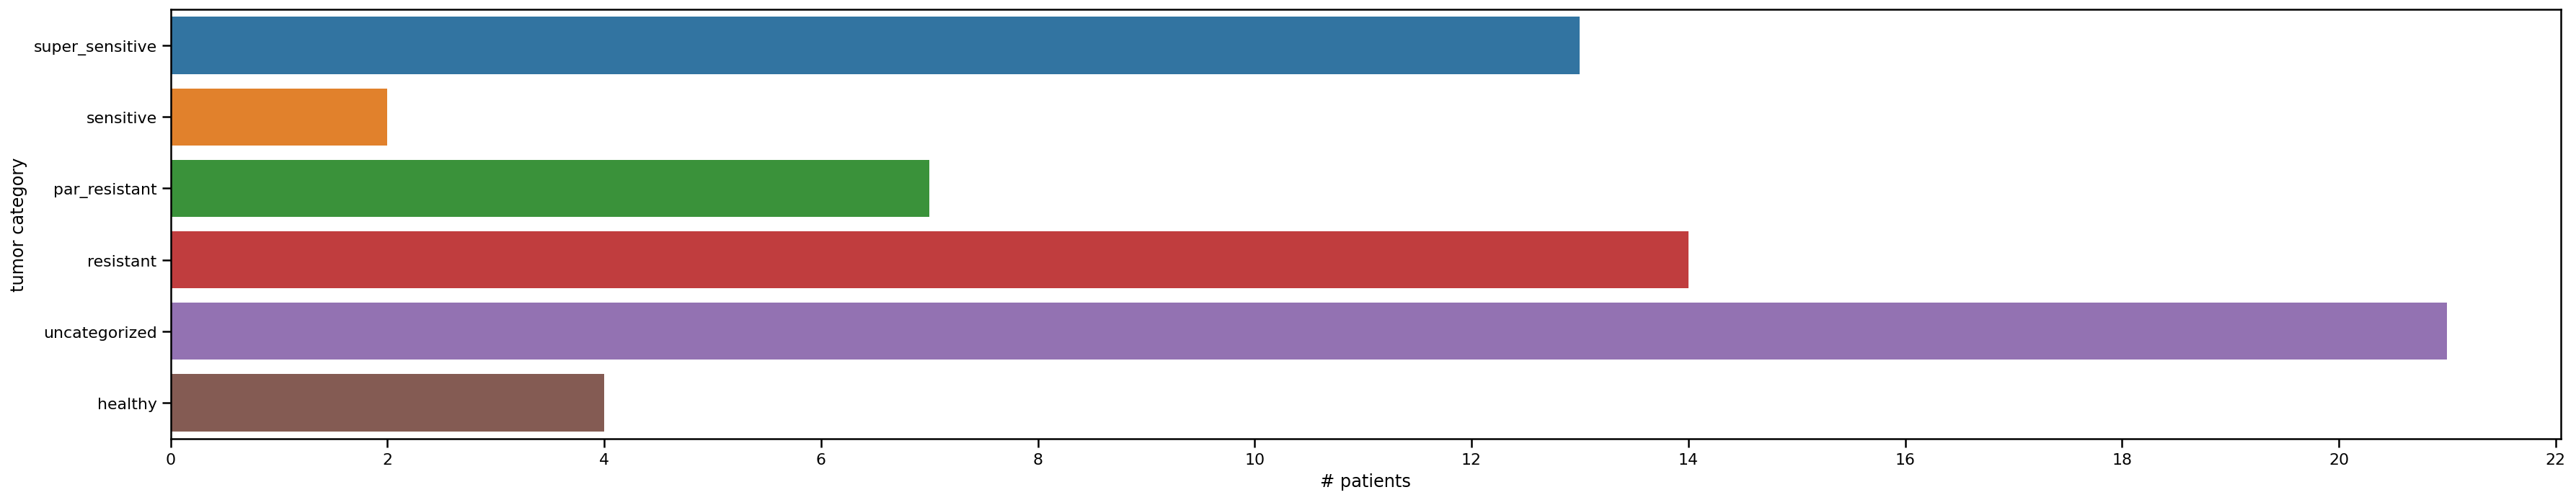

In [12]:
# reset defalut plotting parameters - thanks to http://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet
# plt.rcParams.update(inline_rc)

sns.countplot(y=ovarian_df.tumor_type)

plt.xticks(range(0,23,2))
plt.xlabel('# patients')
plt.ylabel('tumor category')
plt.tight_layout()
plt.savefig('plots_exploratory/tumor_classes_counts.pdf');

# Correlations

## heatmap

(you can choose the color palette from 
[this list](http://matplotlib.org/examples/color/colormaps_reference.html))

(credits to 
[this example](http://seaborn.pydata.org/examples/many_pairwise_correlations.html)
in seaborn doc - more usefull for a subset of features)

(thanks to 
[this SO post](http://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas) 
for `ovarian_df.columns.difference` : cool pandas function! :))

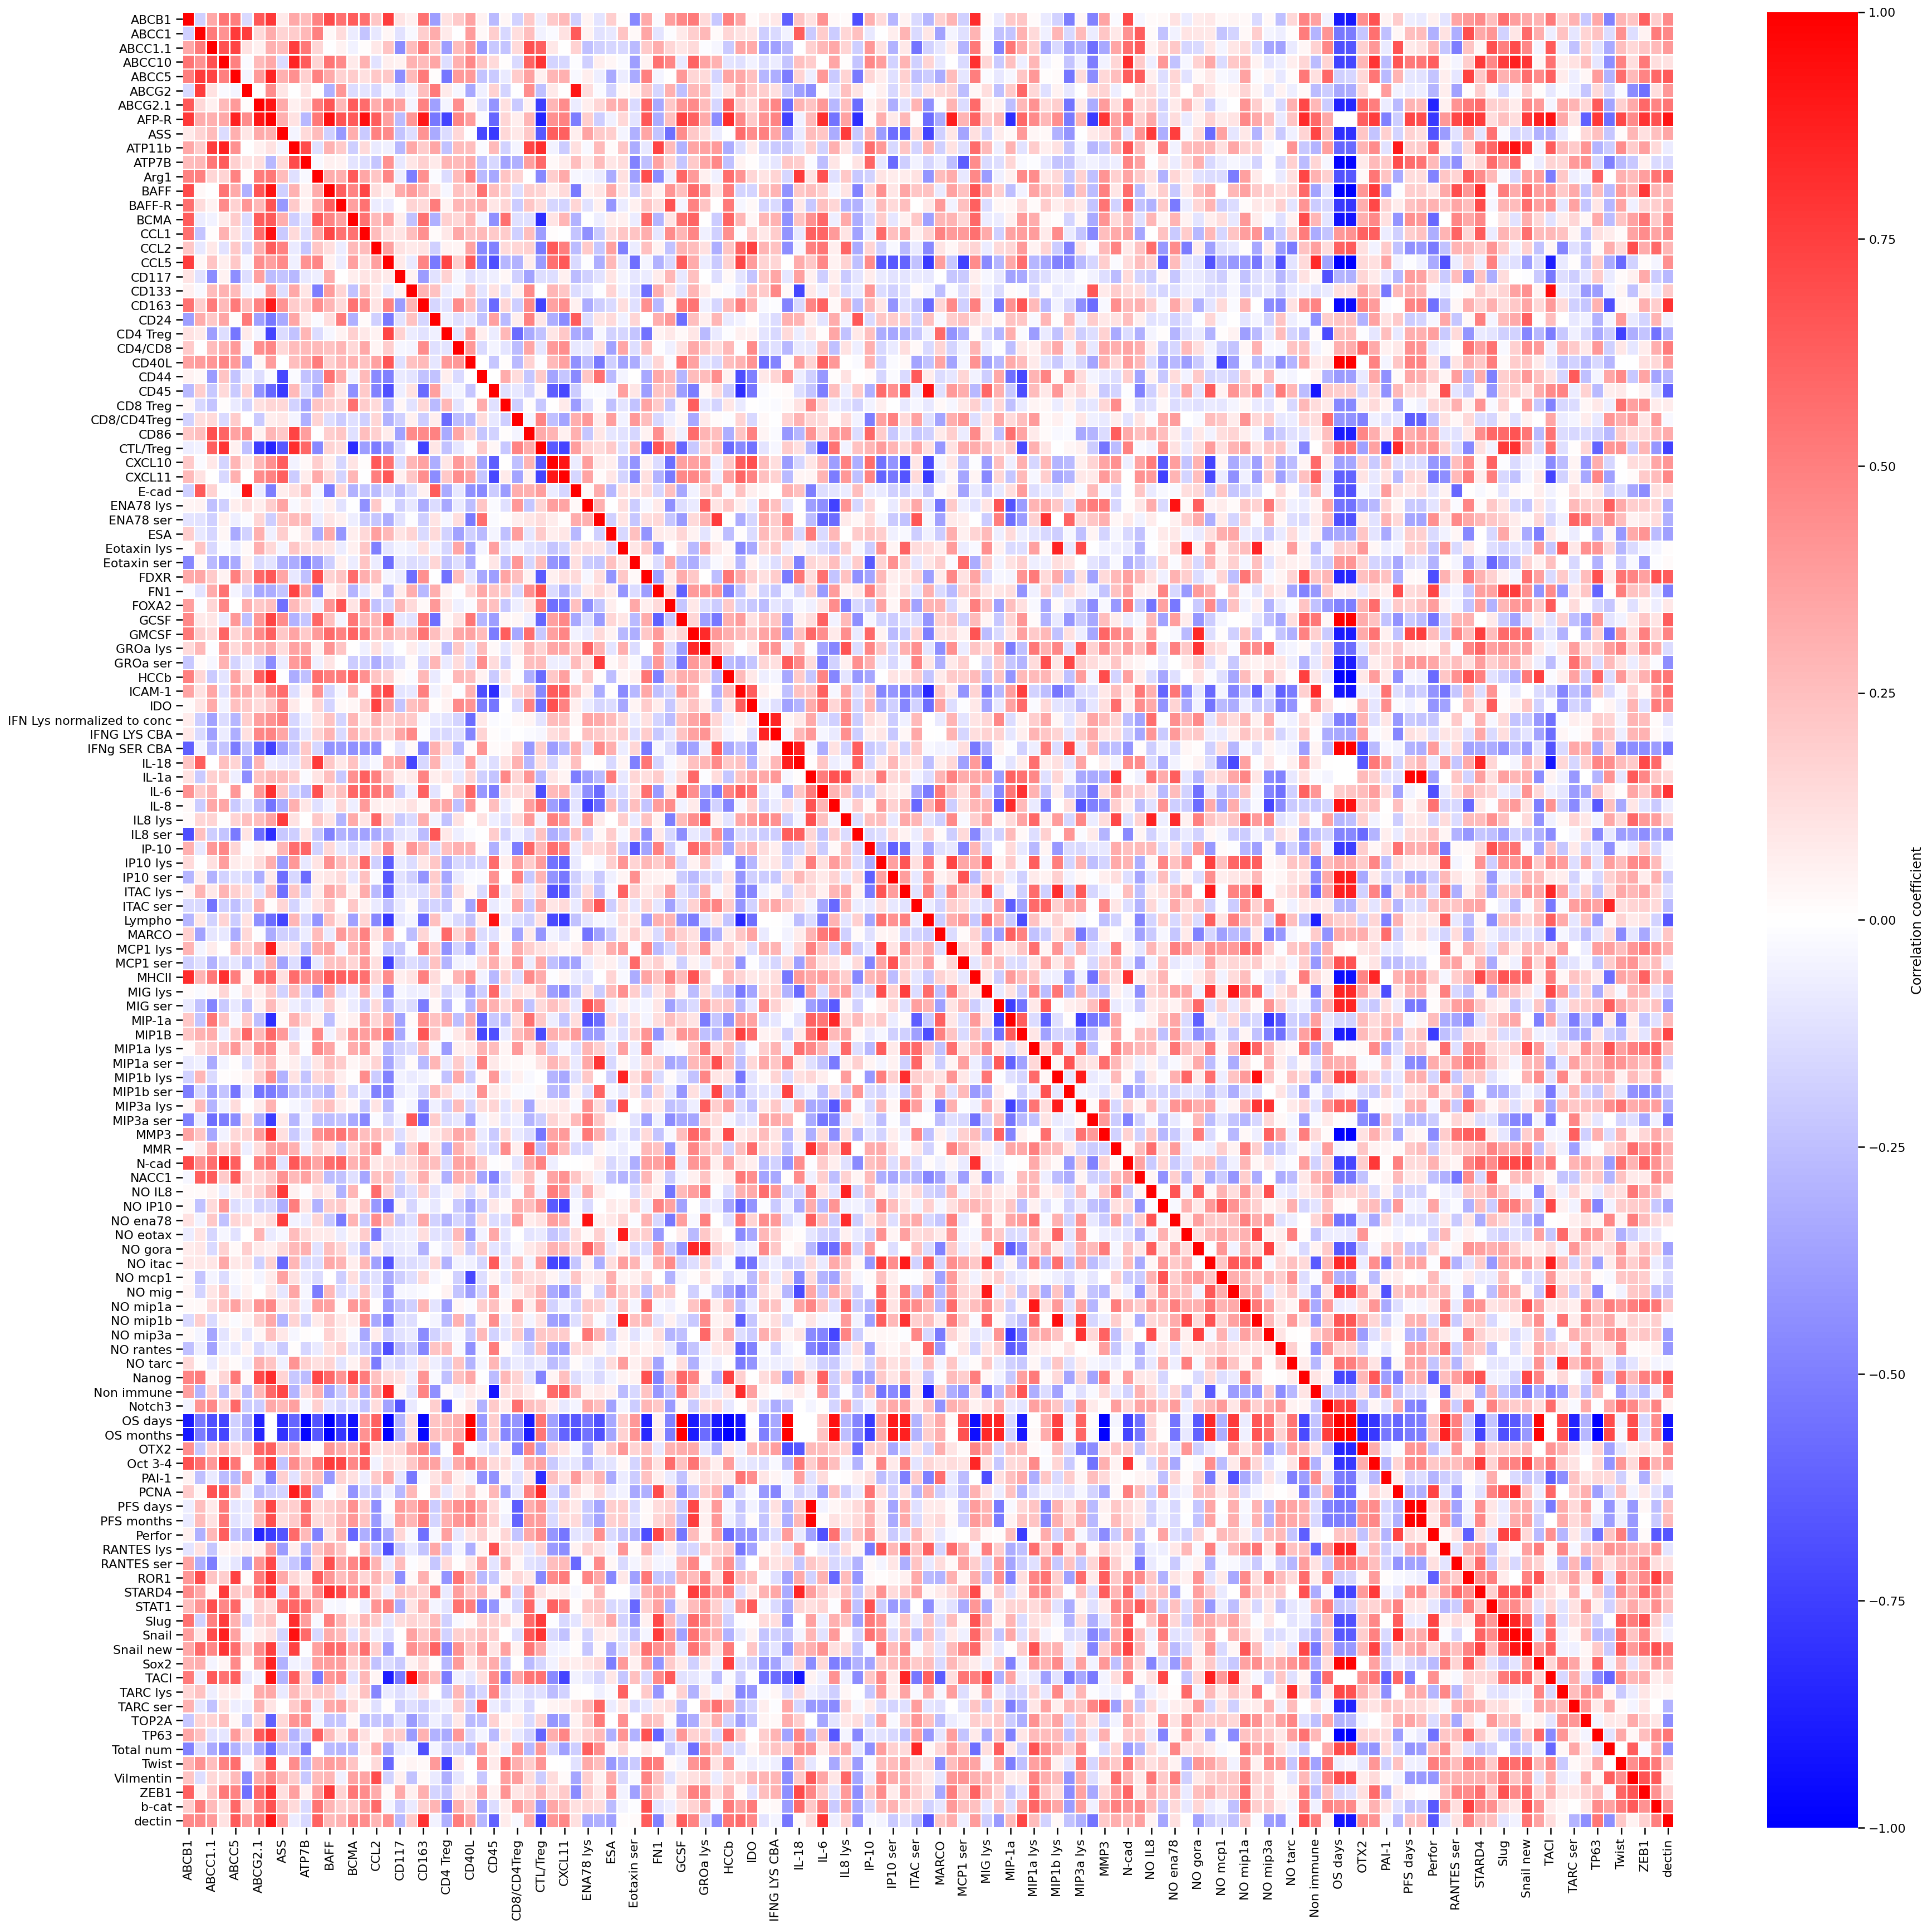

In [13]:
plt.rcParams["figure.figsize"] = [30,30]

sns.heatmap(ovarian_df[ovarian_df.columns.difference(['patient','tumor_type'])].corr(),
            cmap=plt.cm.bwr,linewidths=.7,
            cbar_kws={"label": 'Correlation coefficient'});

## pairwise correlations and p-values

for the pairwise correlations, credits to 
[this answer](http://stackoverflow.com/questions/33997753/calculating-pairwise-correlation-among-all-columns)

In [14]:
%%time

# make empty dict
cc_pvalue_dict = {}

for col_a, col_b in itt.combinations(ovarian_df.iloc[:,7:].columns.tolist(), 2):

    non_null = ovarian_df[col_a].notnull() & ovarian_df[col_b].notnull()
    
    # this threshold for the min. N points is based on stats on non-null -- see first section     
    if non_null.sum() >= 10:
        
        cc_pvalue_dict[col_a + '__' + col_b] =  stats.pearsonr(ovarian_df.loc[non_null,col_a],
                                                               ovarian_df.loc[non_null,col_b])

CPU times: user 6.63 s, sys: 181 ms, total: 6.81 s
Wall time: 6.68 s


here we show the _statistically significant_ correlations

In [15]:
# re-format results in dataframe
cc_pvalue_df = pd.DataFrame.from_dict(cc_pvalue_dict, orient='index')
cc_pvalue_df.columns = ['pearson_cc', 'p_value']

# print results
tld = 1e-3
print('we found', sum(cc_pvalue_df.p_value < tld),'significant correlations')

we found 164 significant correlations


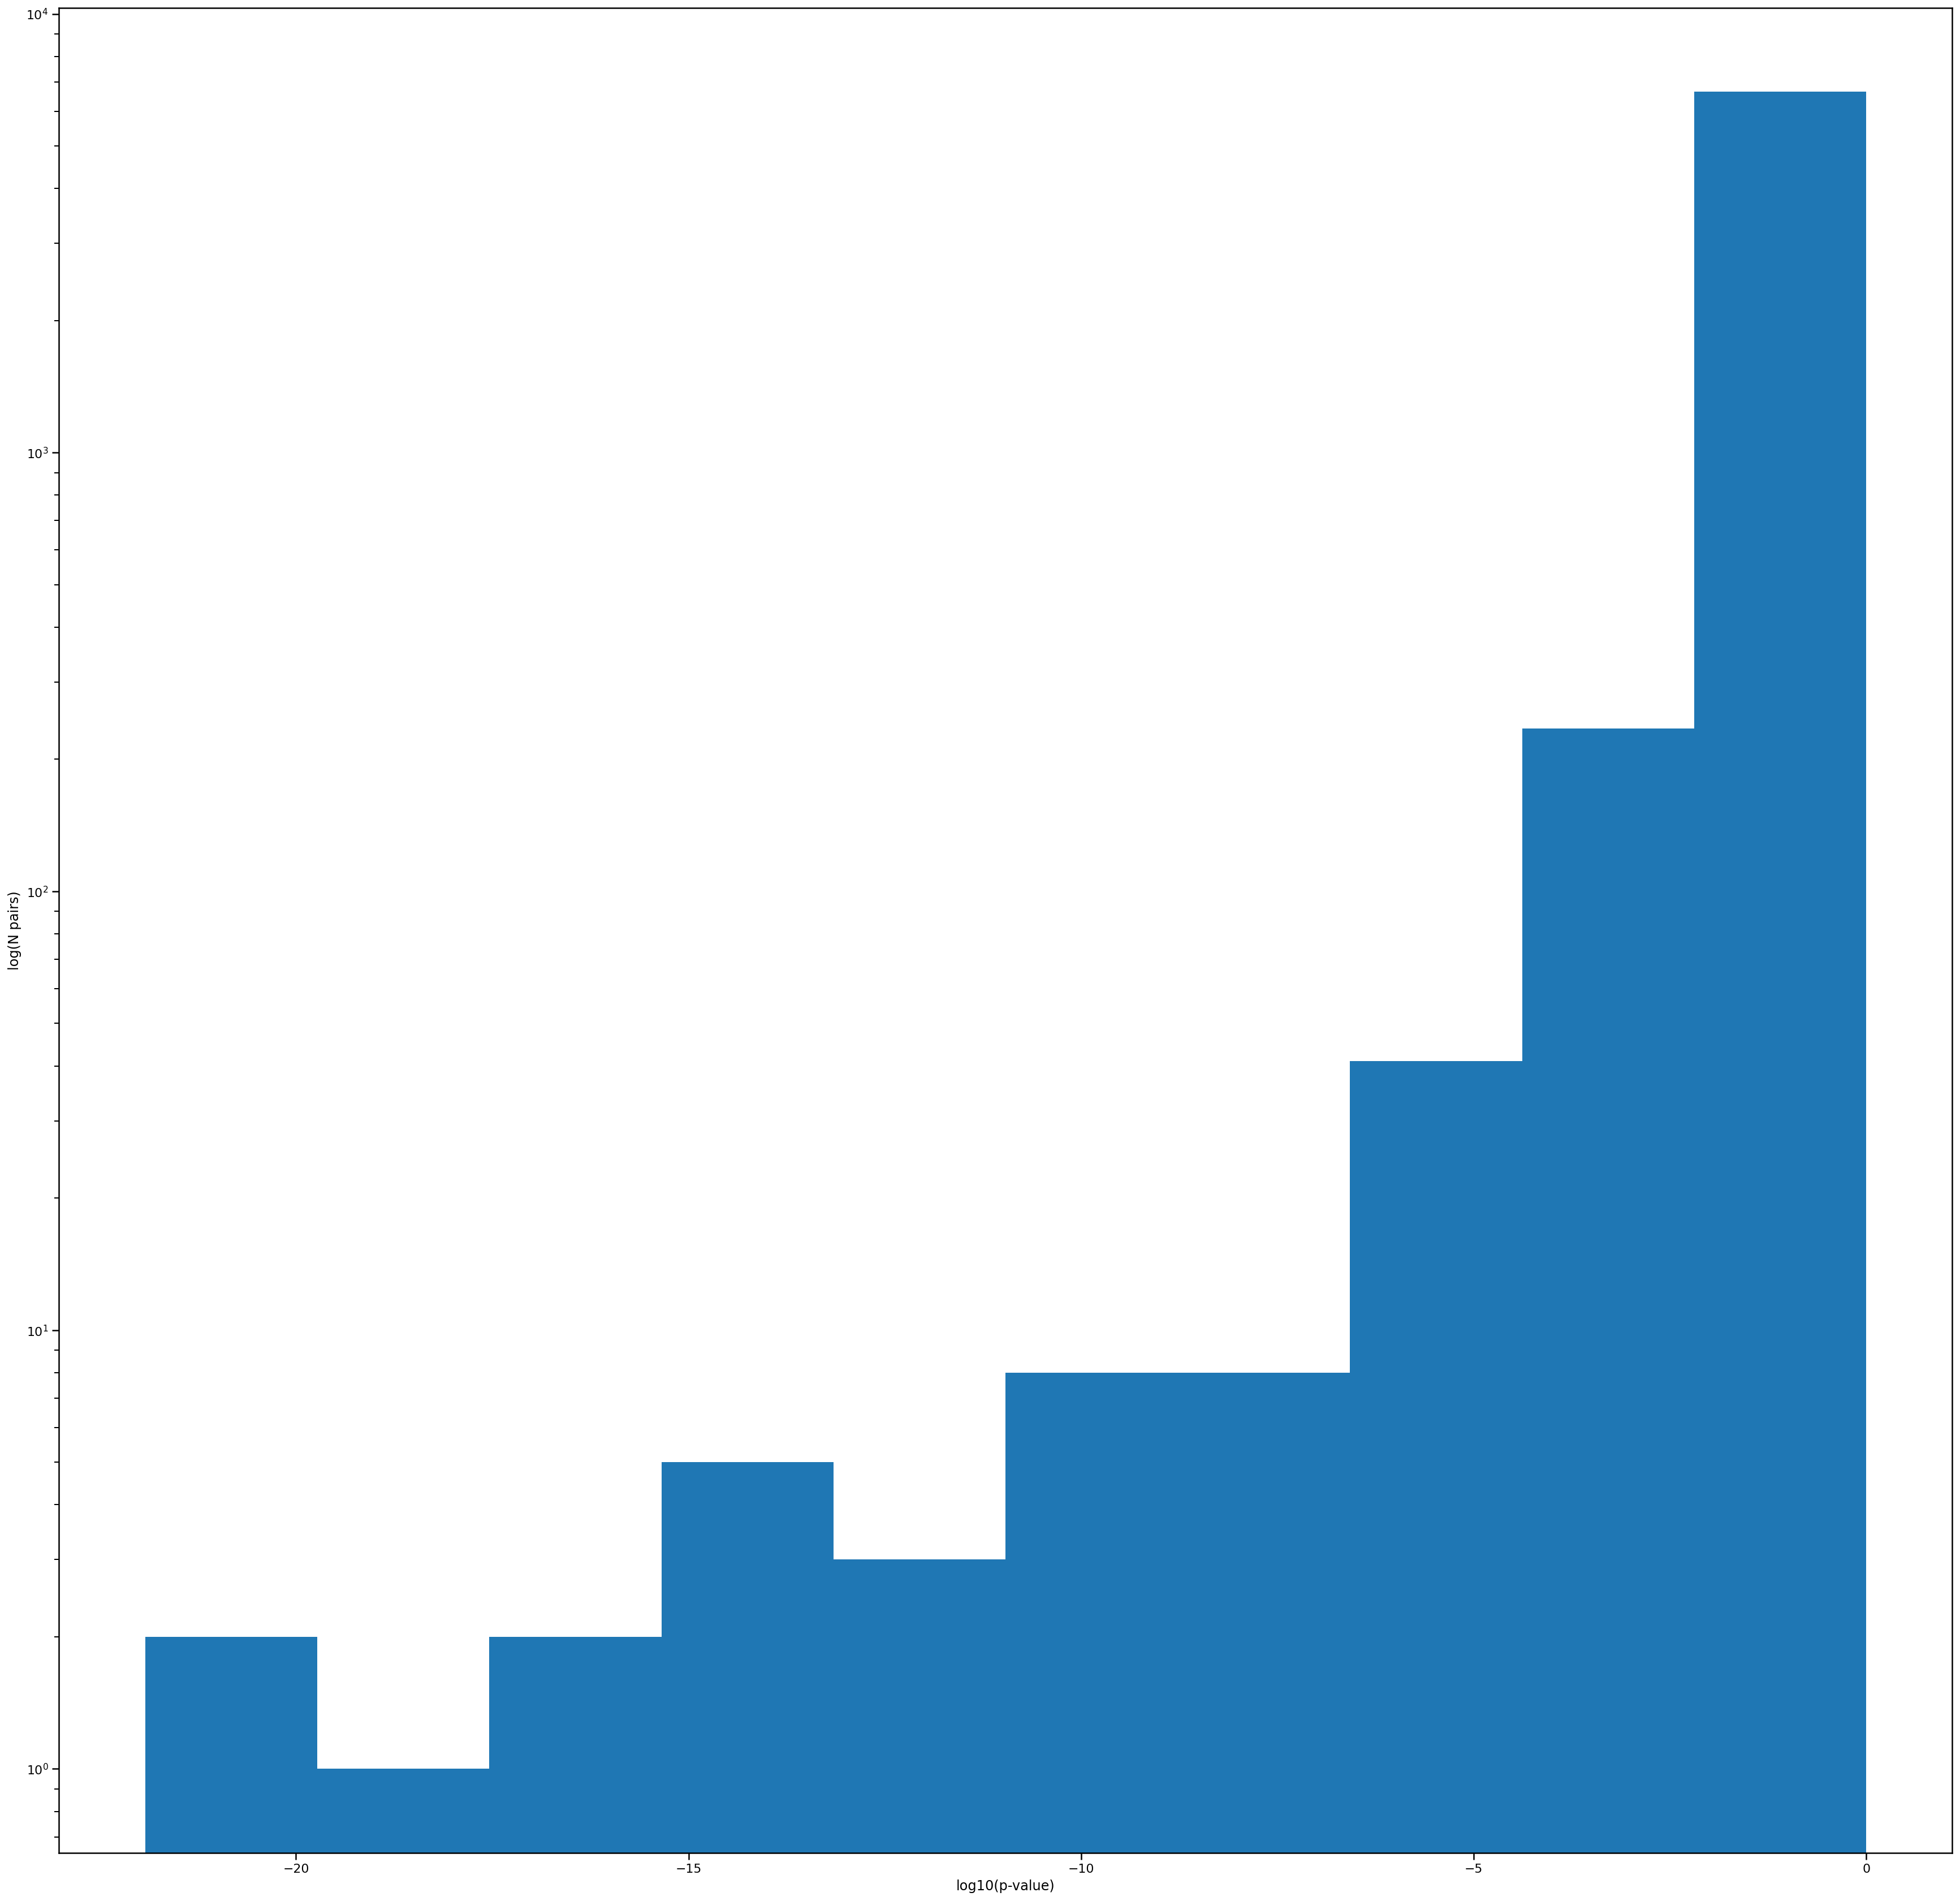

In [16]:
plt.hist(np.log10(cc_pvalue_df[cc_pvalue_df.p_value>0].p_value));
plt.xlabel('log10(p-value)');
plt.yscale('log')
plt.ylabel('log(N pairs)');

In [17]:
cc_pvalue_df[cc_pvalue_df.index.str.contains('CD86')
             & (cc_pvalue_df.p_value < 1e-2)]

,pearson_cc,p_value
ATP11b__CD86,0.730829,0.001968
Snail__CD86,0.667519,0.004723
CD86__MMR,0.627781,0.009222
CD86__ABCC1.1,0.682199,0.003598


In [18]:
cc_pvalue_df[cc_pvalue_df.index.str.contains('ATP11b')
             & (cc_pvalue_df.p_value < 1e-3)]

,pearson_cc,p_value
ATP11b__PCNA,0.883617,1.253947e-05
ATP11b__Slug,0.818565,1.906065e-04
ATP11b__Snail,0.935392,3.107576e-07
ATP11b__ABCC10,0.854696,4.934210e-05


In [19]:
cc_pvalue_df[cc_pvalue_df.index.str.contains('CXCL10')
             & (cc_pvalue_df.p_value < 1e-2)]

,pearson_cc,p_value
Lympho__CXCL10,-0.705146,0.004850
NO IP10__CXCL10,-0.647528,0.006689
ITAC lys__CXCL10,-0.678047,0.003892
NO itac__CXCL10,-0.729859,0.001329
CXCL10__IDO,0.683975,0.003479
CXCL10__ASS,0.627244,0.009301
CXCL10__CCL2,0.641336,0.007415
CXCL10__ICAM-1,0.637144,0.007941
CXCL10__CXCL11,0.908379,0.000001


## hierarchical clustering on correlation

(here is a nice
[tutorial](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering)
on Hierarchical-Clustering in python 
and the [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html))

In [20]:
%%time

# make empty dict
cc_dict = {}

for col_a,values_a in ovarian_df[ovarian_df.iloc[:,7:].columns].iteritems():
    
    cc_dict[col_a] = {}
    
    for col_b,values_b in ovarian_df[ovarian_df.iloc[:,7:].columns].iteritems():
        

        non_null = ovarian_df[col_a].notnull() & ovarian_df[col_b].notnull()

#         if non_null.sum() >= 10:
        pcc_pvalue =  stats.pearsonr(ovarian_df.loc[non_null,col_a],
                                     ovarian_df.loc[non_null,col_b])

#         if pcc_pvalue[1] < 0.01:

        ## mind we consider the absolute value!!
        cc_dict[col_a][col_b] = np.round(np.abs(pcc_pvalue[0]),4)

CPU times: user 13.2 s, sys: 142 ms, total: 13.4 s
Wall time: 13.3 s


In [21]:
# re-format p-values in dataframe
cc_df = pd.DataFrame.from_dict(cc_dict)

print(cc_df.shape)
cc_df.head()

(122, 122)


,CD45,Lympho,Non immune,CD24,CD44,CD117,CD133,ESA,ABCC1,ABCG2,...,ABCC1.1,b-cat,BCMA,CD163,CXCL11,E-cad,HCCb,IL-6,MIP1B,Nanog
CD45,1.0000,0.9280,0.9218,0.3719,0.0058,0.0670,0.1144,0.0396,0.1933,0.1719,...,0.2160,0.1360,0.4350,0.5818,0.7138,0.1970,0.2064,0.5012,0.6893,0.2645
Lympho,0.9280,1.0000,0.8686,0.2447,0.0777,0.0871,0.0431,0.0598,0.0993,0.1156,...,0.1746,0.1765,0.3699,0.5799,0.7763,0.2393,0.2275,0.5220,0.7025,0.2390
Non immune,0.9218,0.8686,1.0000,0.4372,0.0539,0.0340,0.1135,0.0620,0.2923,0.2626,...,0.1767,0.0558,0.2883,0.4826,0.6099,0.2869,0.1075,0.4076,0.6694,0.1077
CD24,0.3719,0.2447,0.4372,1.0000,0.2350,0.1132,0.2419,0.1461,0.3265,0.5169,...,0.2135,0.2892,0.3052,0.1611,0.4474,0.6361,0.0810,0.1089,0.2247,0.0268
CD44,0.0058,0.0777,0.0539,0.2350,1.0000,0.0848,0.1070,0.2724,0.0278,0.0600,...,0.3838,0.3546,0.0492,0.2353,0.2219,0.4602,0.0505,0.3990,0.7239,0.0003


In [22]:
from scipy.cluster import hierarchy

import scipy.spatial.distance as ssd

In [23]:
# credits to http://stackoverflow.com/questions/18952587/use-distance-matrix-in-scipy-cluster-hierarchy-linkage

# convert df to matrix ...
# and change nan to 0 - TO BE CHECKED WHERE!
my_dist = np.nan_to_num(np.matrix(cc_df - np.diag(np.repeat(1,cc_df.shape[0]))))
distArray = ssd.squareform(my_dist)

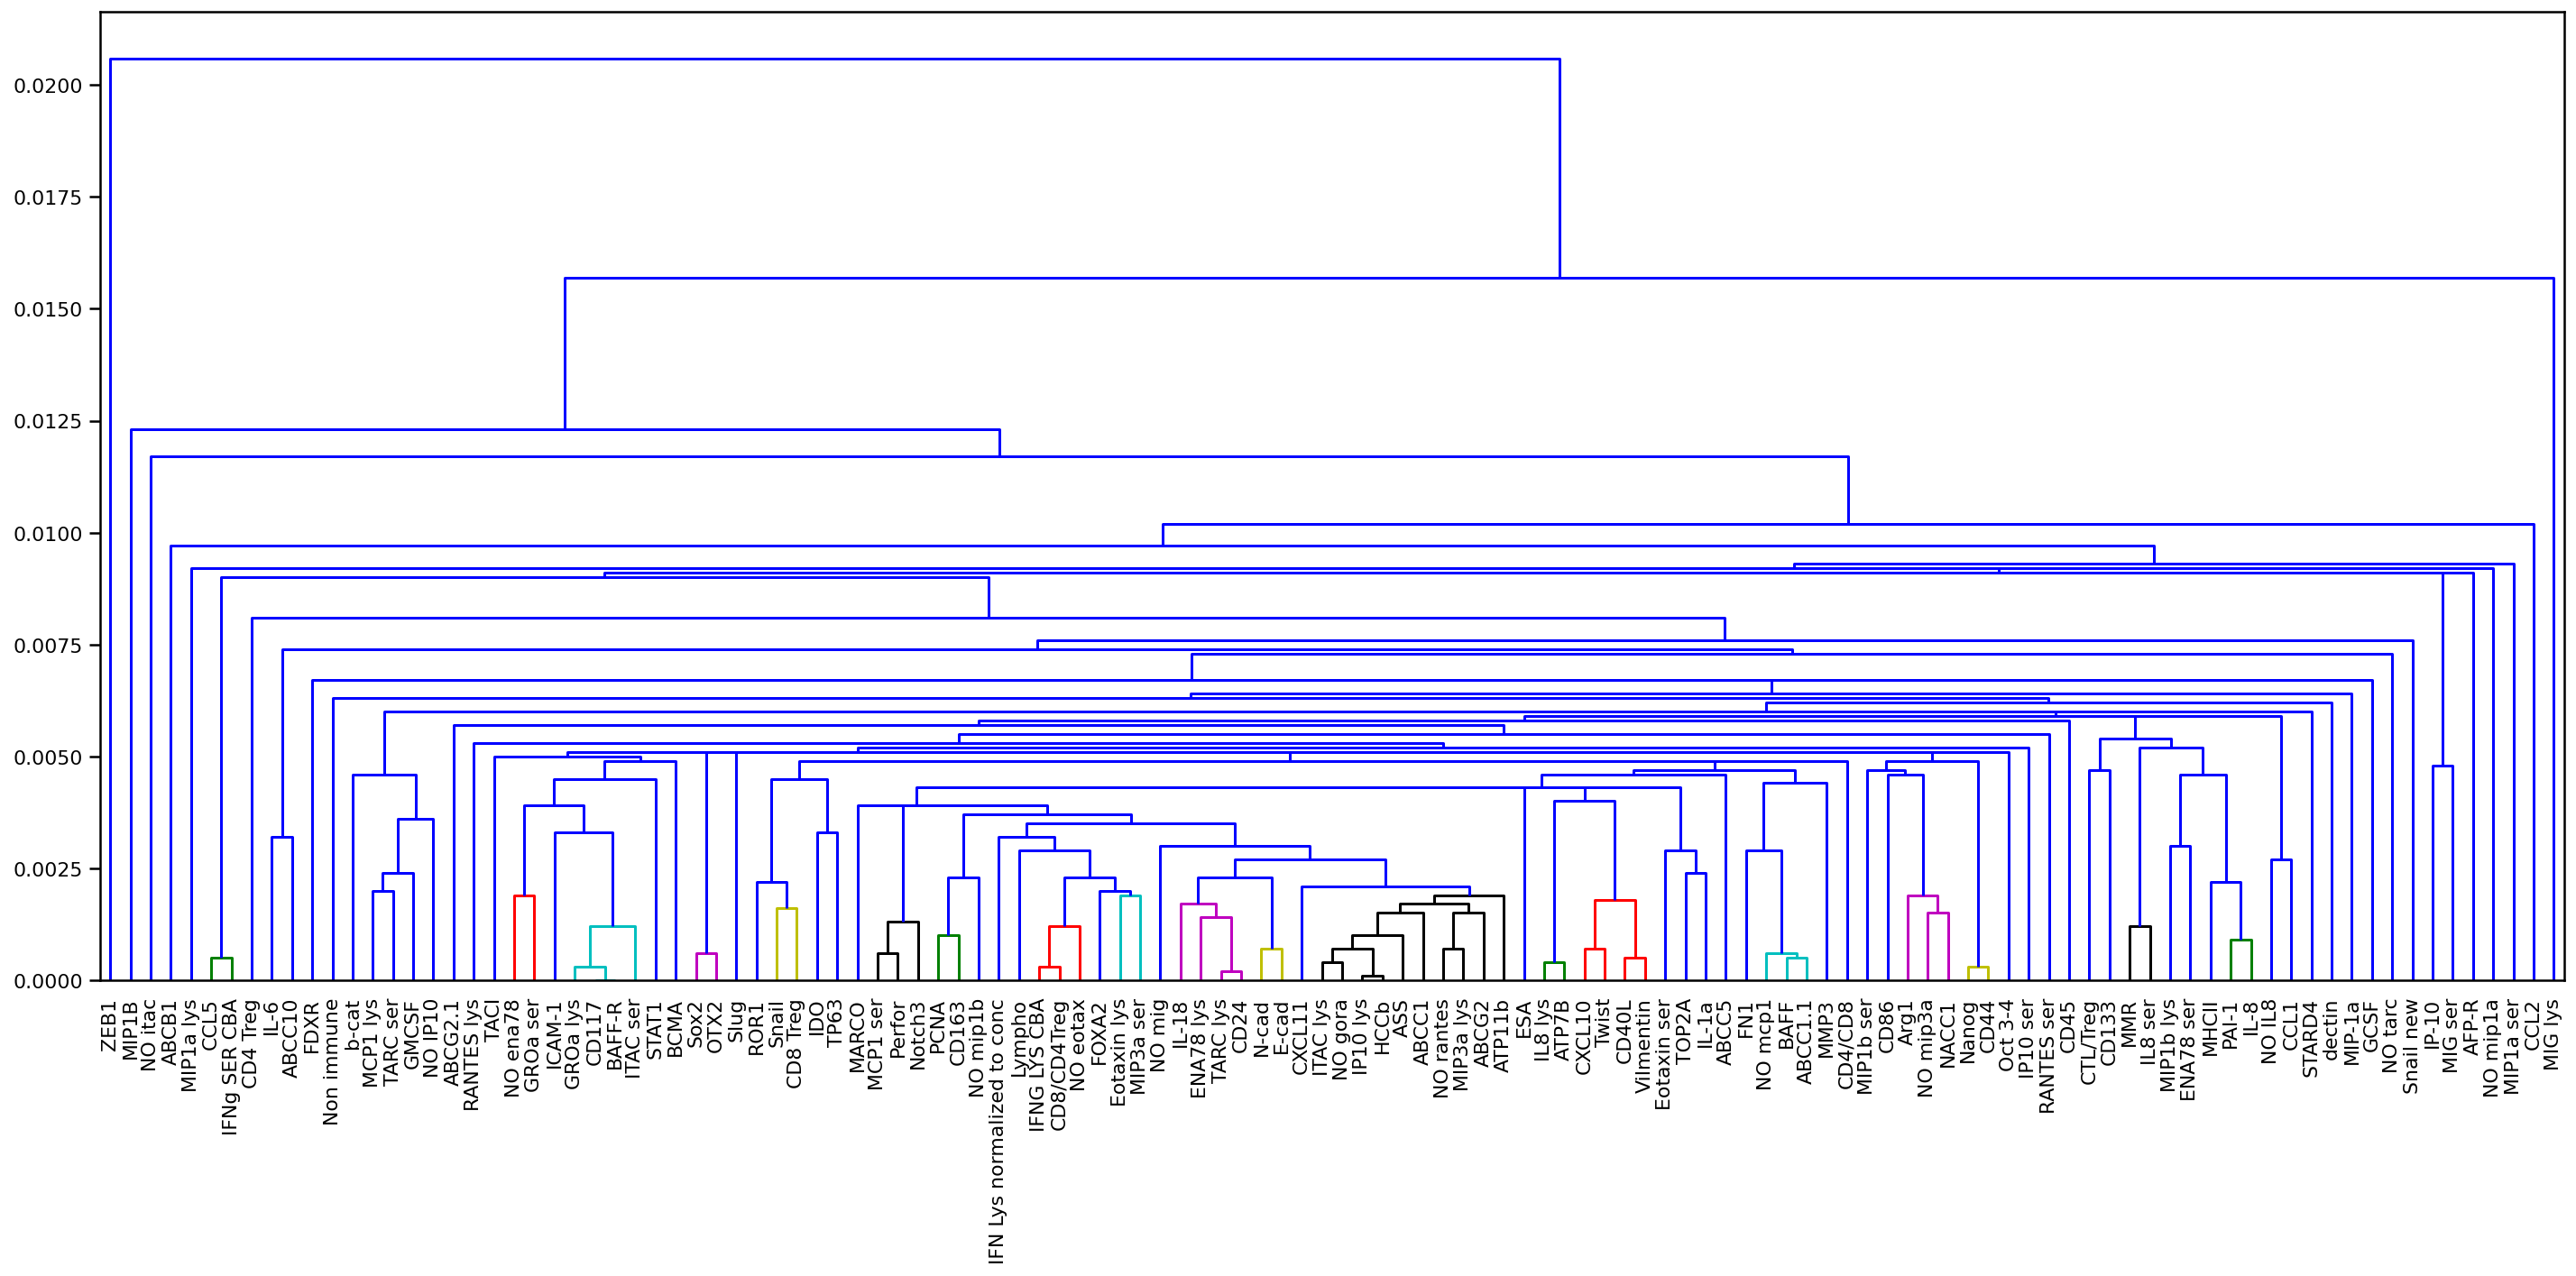

In [24]:
plt.rcParams["figure.figsize"] = [20, 10]

dend_p_val = hierarchy.dendrogram(hierarchy.linkage(distArray,optimal_ordering=True),
                                  leaf_font_size=11,
                                  labels=cc_df.columns,
                                  color_threshold=0.002)
#                                   orientation='left');
plt.tight_layout()
plt.savefig('plots_exploratory/dendro_corr_all.pdf')

using default functions

In [26]:
# select columns with at least N non-null

nonnull_counts = ovarian_df.iloc[:,7:].notnull().sum()

nonnull_counts.shape

(122,)

In [27]:
n_entries_list = []
min_nonnull_list = range(10,ovarian_df.shape[0])

for i in min_nonnull_list:
    
    temp_df = ovarian_df[nonnull_counts[nonnull_counts > i].keys()].dropna()
    
    n_entries_list.append(temp_df.shape[0] * temp_df.shape[1])

del temp_df    

37
1219


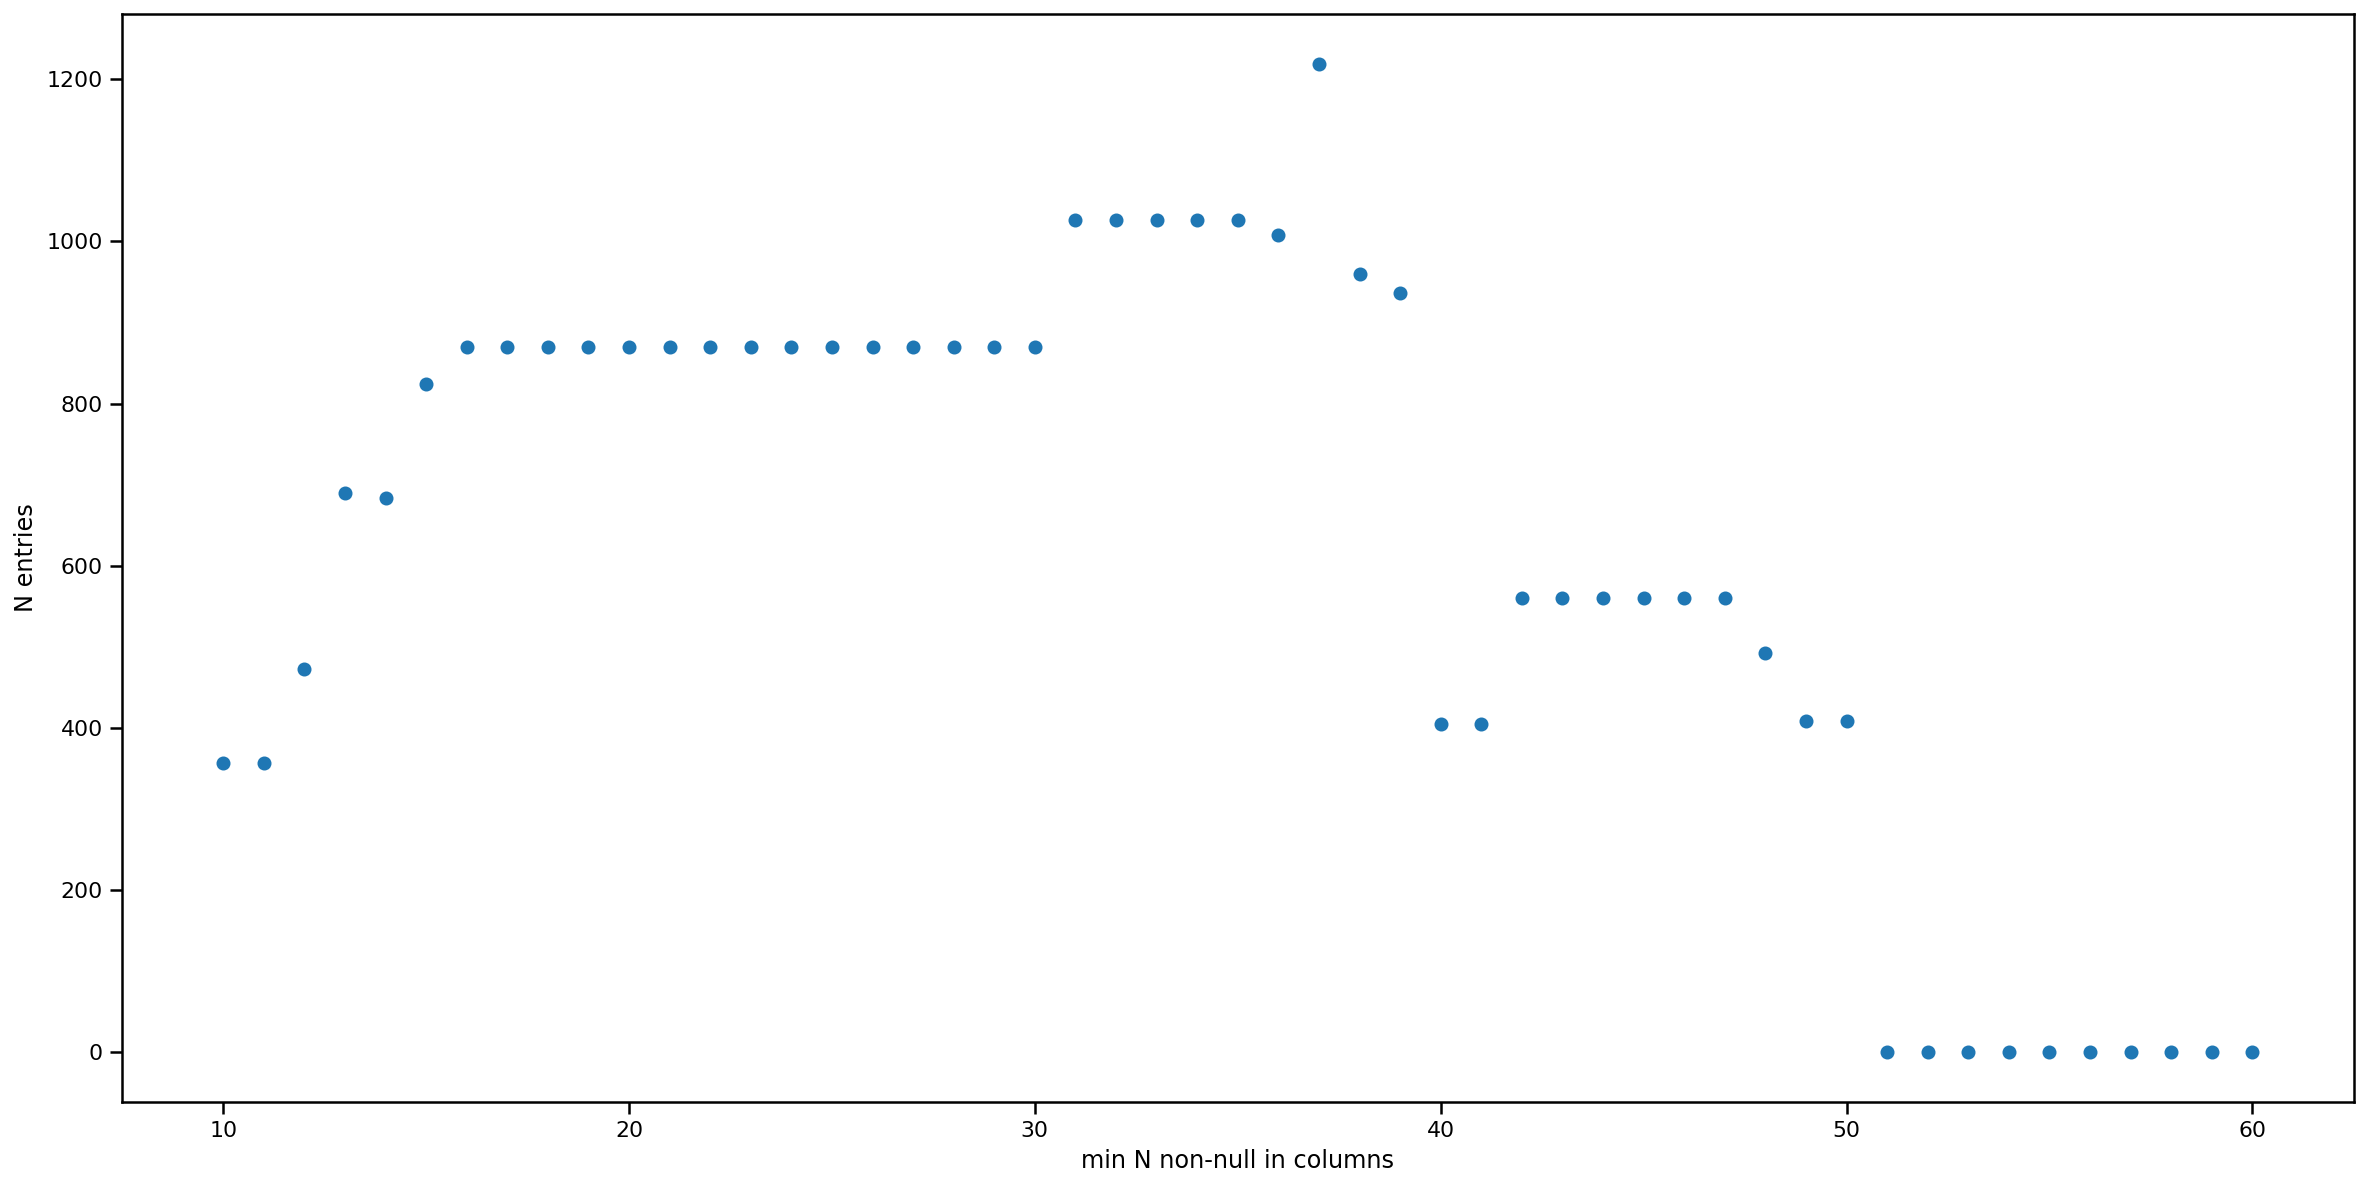

In [28]:
opt_min_nonnulls = min_nonnull_list[np.argmax(n_entries_list)]
print(opt_min_nonnulls)
print(np.max(n_entries_list))

plt.scatter(min_nonnull_list,n_entries_list)
plt.xlabel('min N non-null in columns')
plt.ylabel('N entries');

In [29]:
optim_df = ovarian_df[nonnull_counts[nonnull_counts > opt_min_nonnulls].keys()].dropna()
optim_df.shape

(23, 53)

In [30]:
Z = hierarchy.linkage(optim_df.transpose(), 'single', 'correlation',optimal_ordering=True)

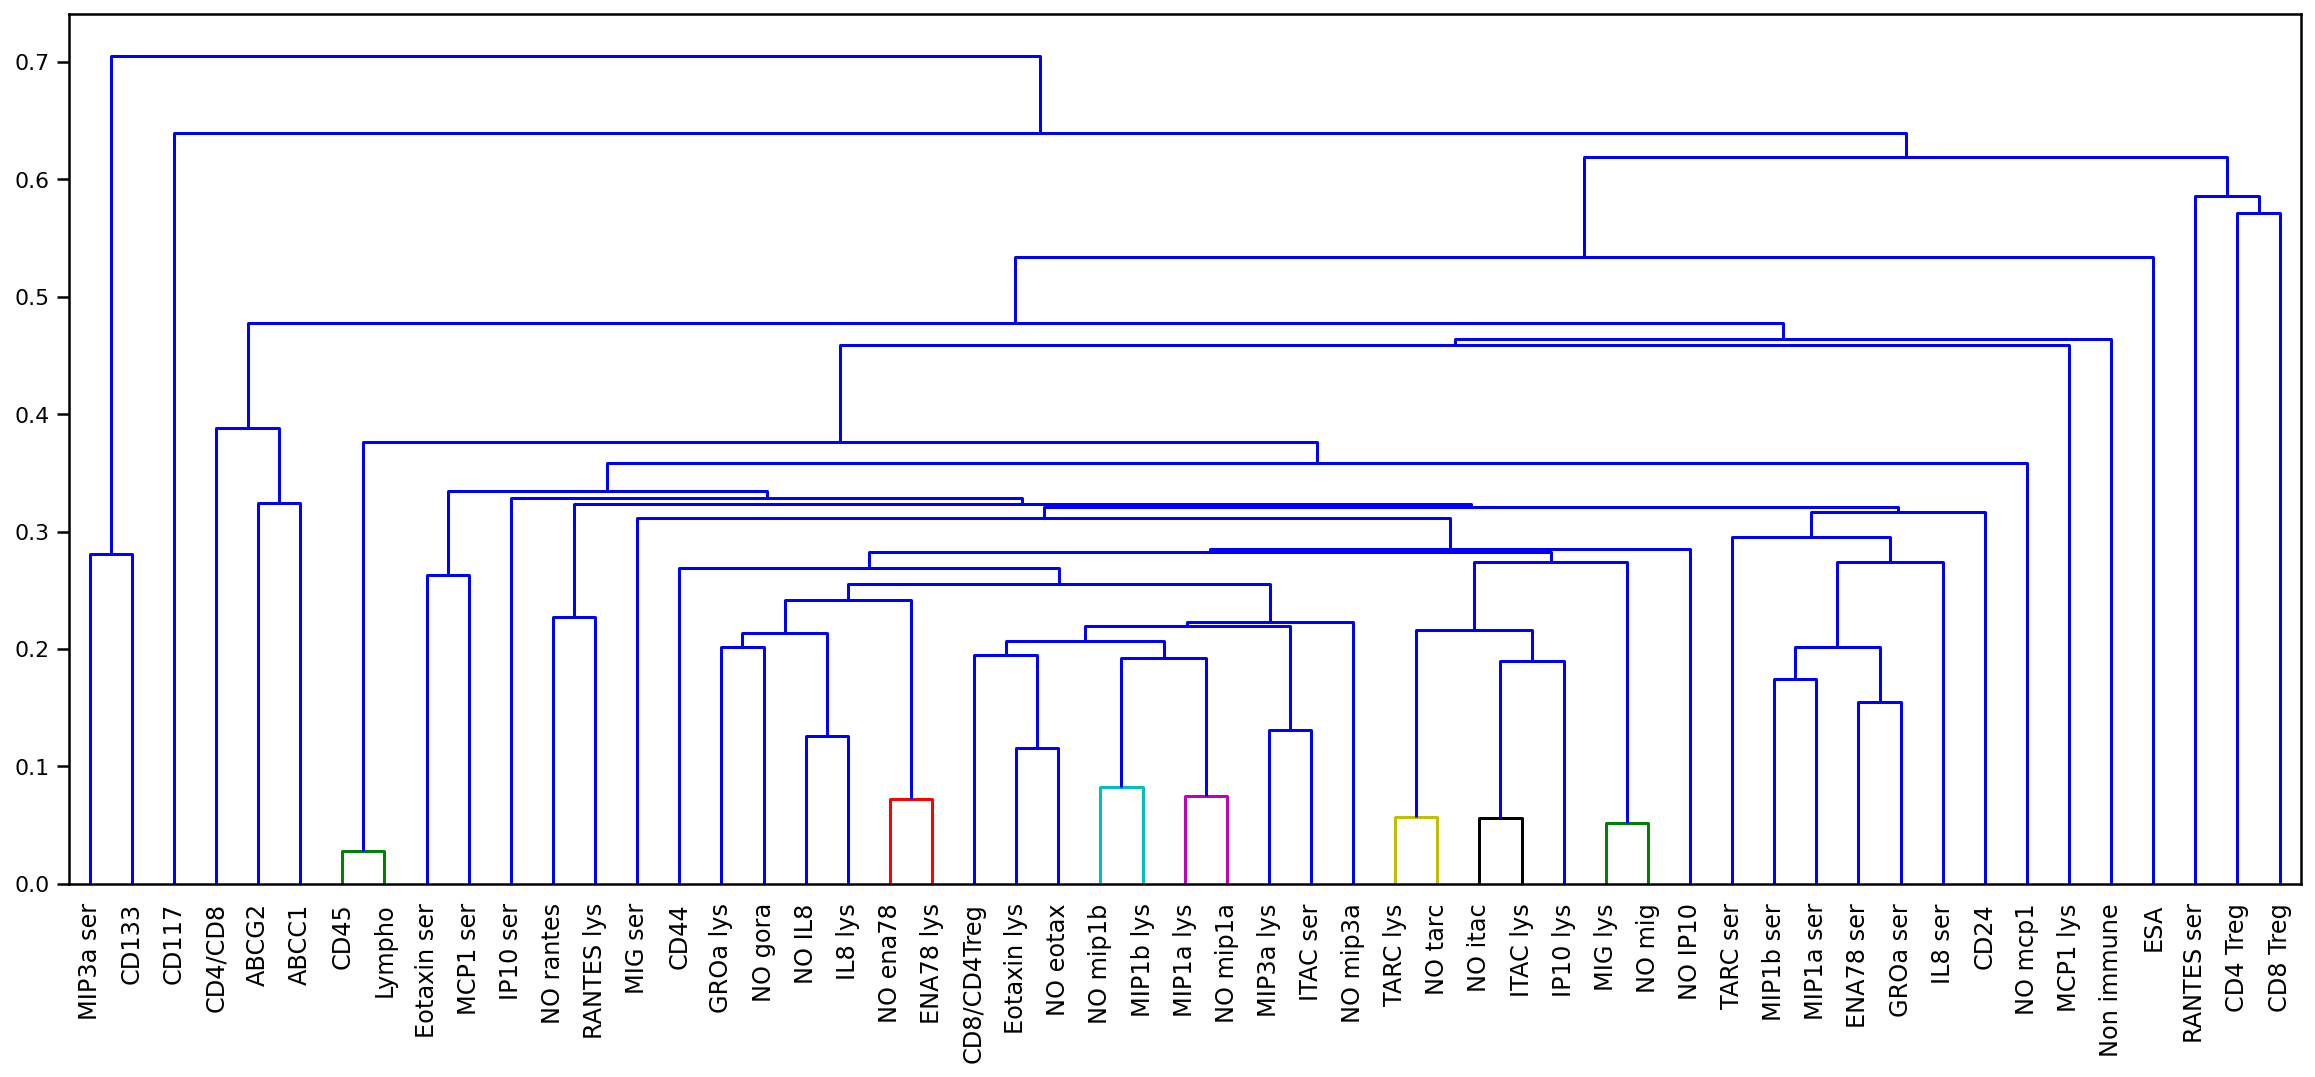

In [31]:
plt.rcParams["figure.figsize"] = [20,8]
hierarchy.dendrogram(Z,
                     color_threshold=0.1,
                     labels=optim_df.columns,
                     leaf_font_size=12,
                     leaf_rotation=90);

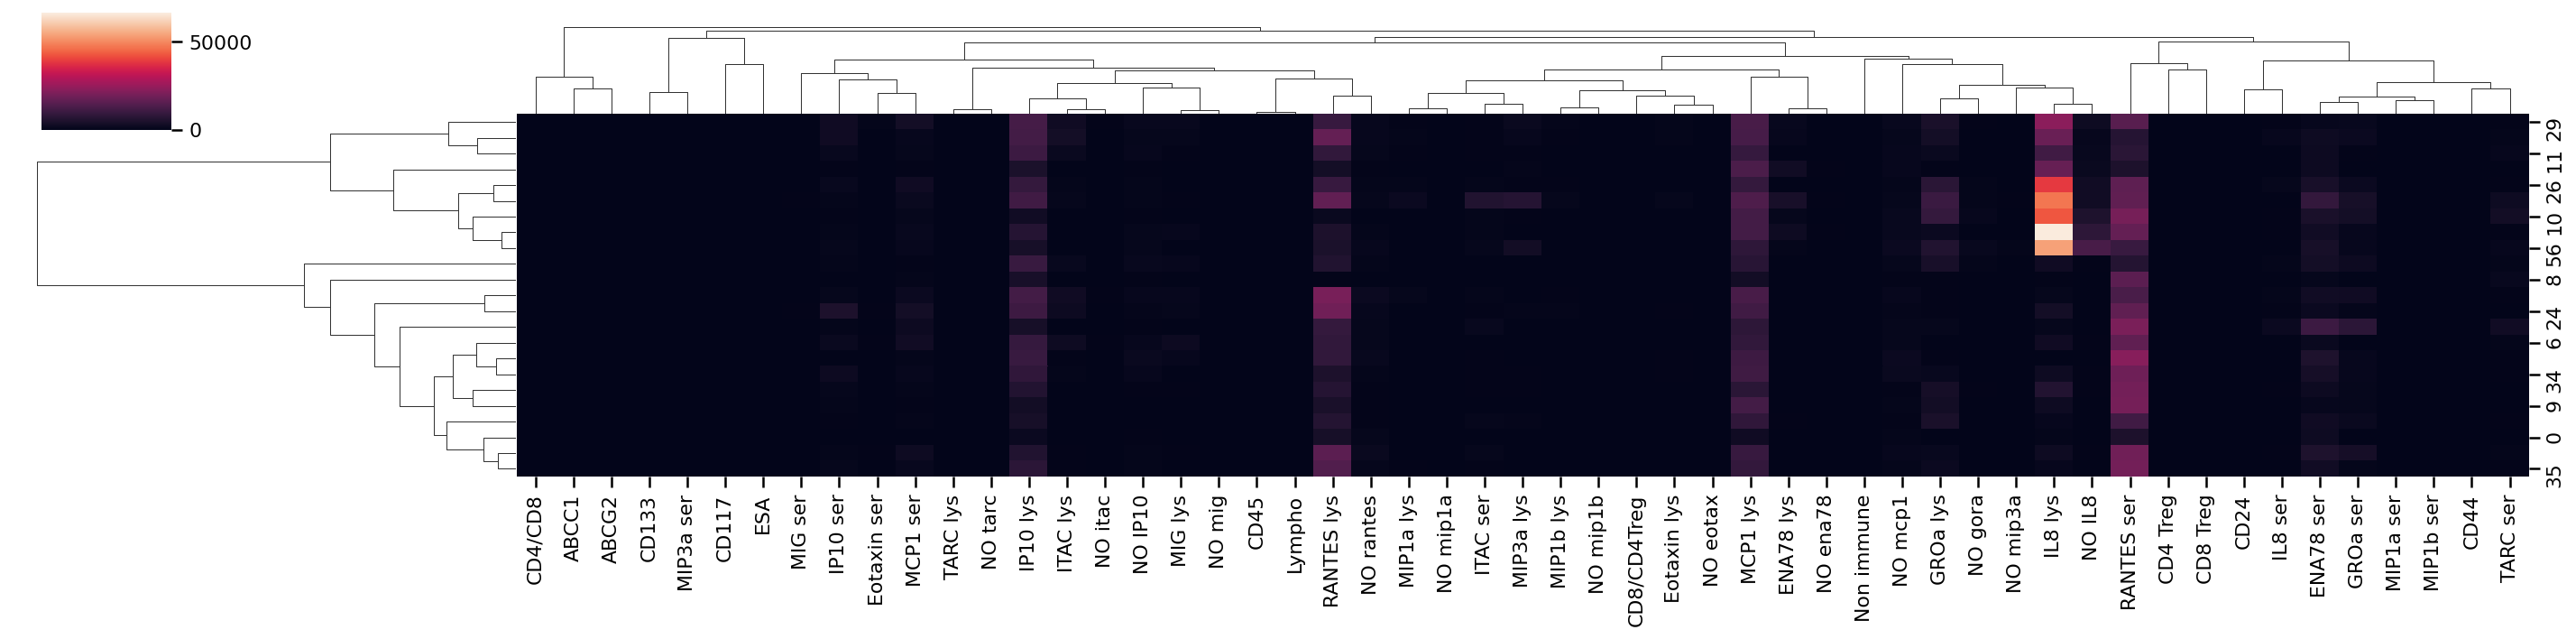

In [32]:
sns.clustermap(optim_df,metric='correlation',figsize=(20,5));

# Distributions

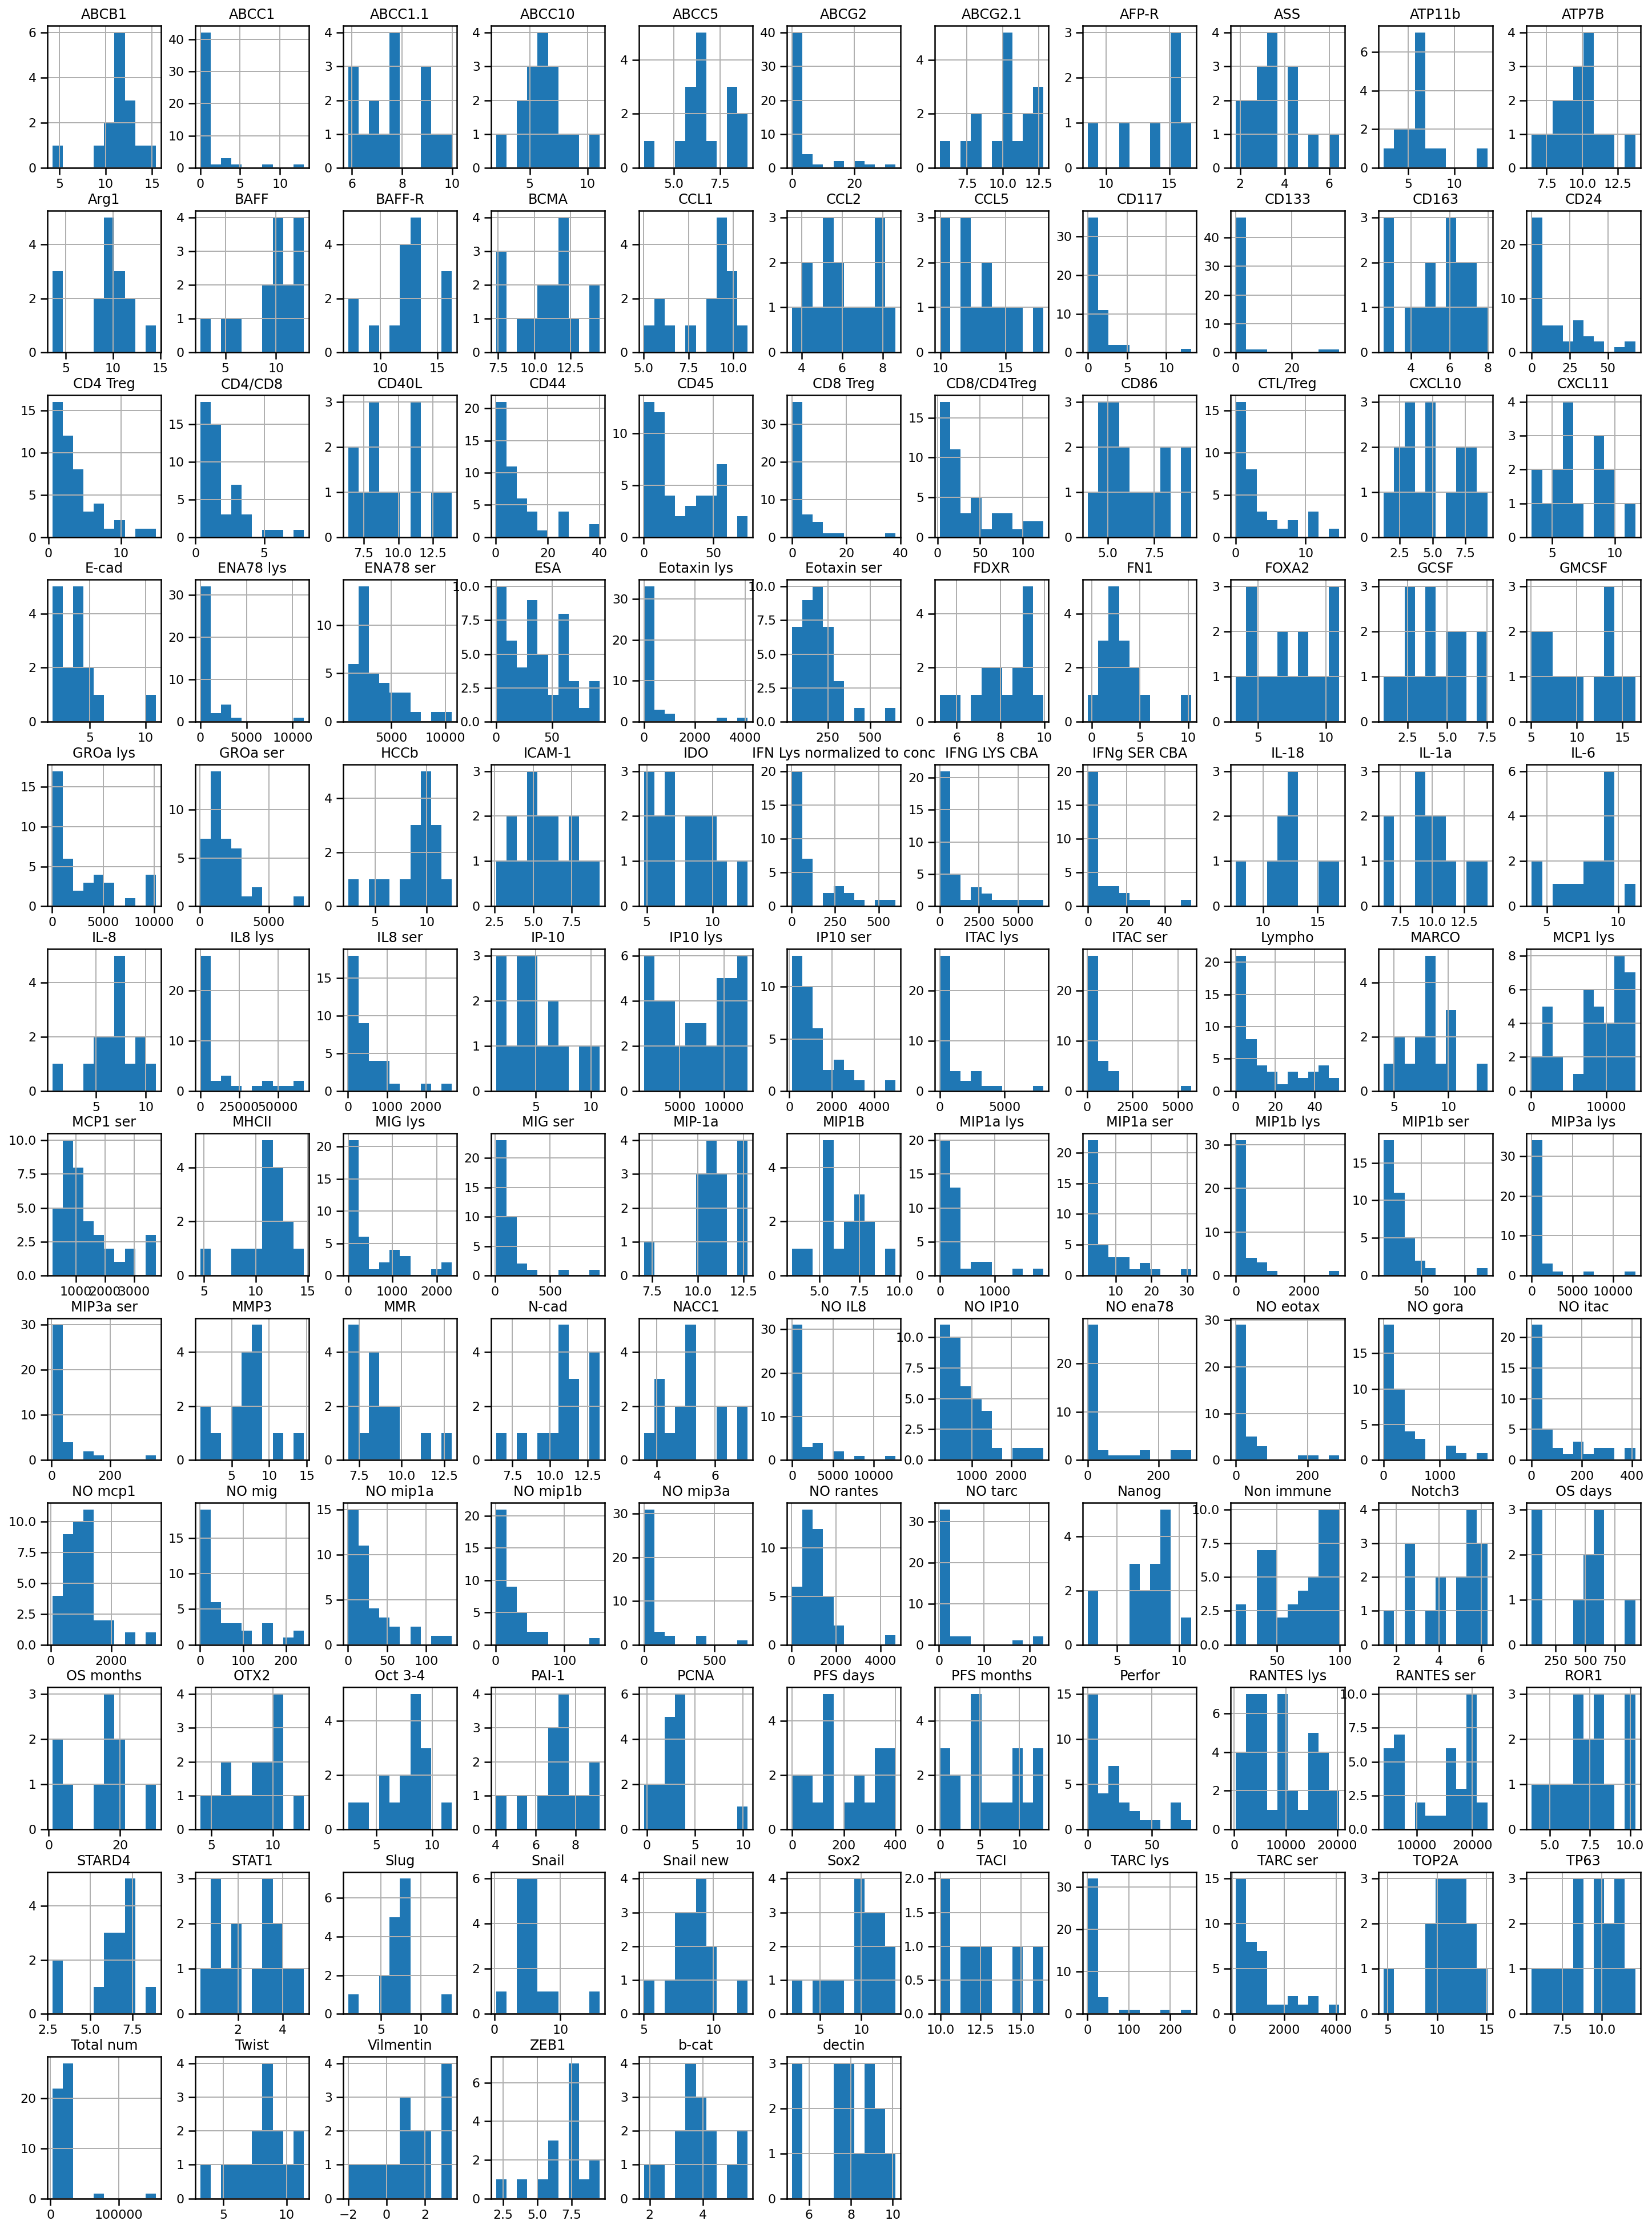

In [33]:
plt.rcParams["figure.figsize"] = [25,35]
ovarian_df.hist();

histogram of the _most predictive features_ - according to the classification performed in the other notebook 

In [15]:
# plt.rcParams = inline_rc 
# ovarian_df[['Eotaxin ser', 'MCP1 ser', 'MIP1a ser', 'MIG ser','MIP3a ser','GROa ser', 'MIP1b ser']].hist();

##  pre-process features

remove the tumor category we are _not interested_ 'uncategorized', 'healthy':

In [34]:
ovarian_df_cleaned = ovarian_df[~ovarian_df.tumor_type.isin(['uncategorized', 'healthy'])]

merge 2 types of `resistant` and `sensitive`:

In [35]:
ovarian_df_cleaned.tumor_type[ovarian_df_cleaned.tumor_type=='par_resistant'] = 'resistant'
ovarian_df_cleaned.tumor_type[ovarian_df_cleaned.tumor_type=='super_sensitive'] = 'sensitive'

<ipython-input-35-6d9d6f0e9326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovarian_df_cleaned.tumor_type[ovarian_df_cleaned.tumor_type=='par_resistant'] = 'resistant'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-35-6d9d6f0e9326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o

test the results

In [36]:
ovarian_df_cleaned.tumor_type.value_counts()

resistant    21
sensitive    15
Name: tumor_type, dtype: int64

## KS test: resistant VS non-res

In [42]:
# stat_signi_feat = []
ks_test = {}

for col in ovarian_df_cleaned.columns.difference(['patient','tumor_type']):
    
    #  we ONLY save the p-value!
    ks_test[col] = stats.ks_2samp(ovarian_df_cleaned.loc[ovarian_df_cleaned.tumor_type=='sensitive',col],
                                  ovarian_df_cleaned.loc[ovarian_df_cleaned.tumor_type=='resistant',col])[1]

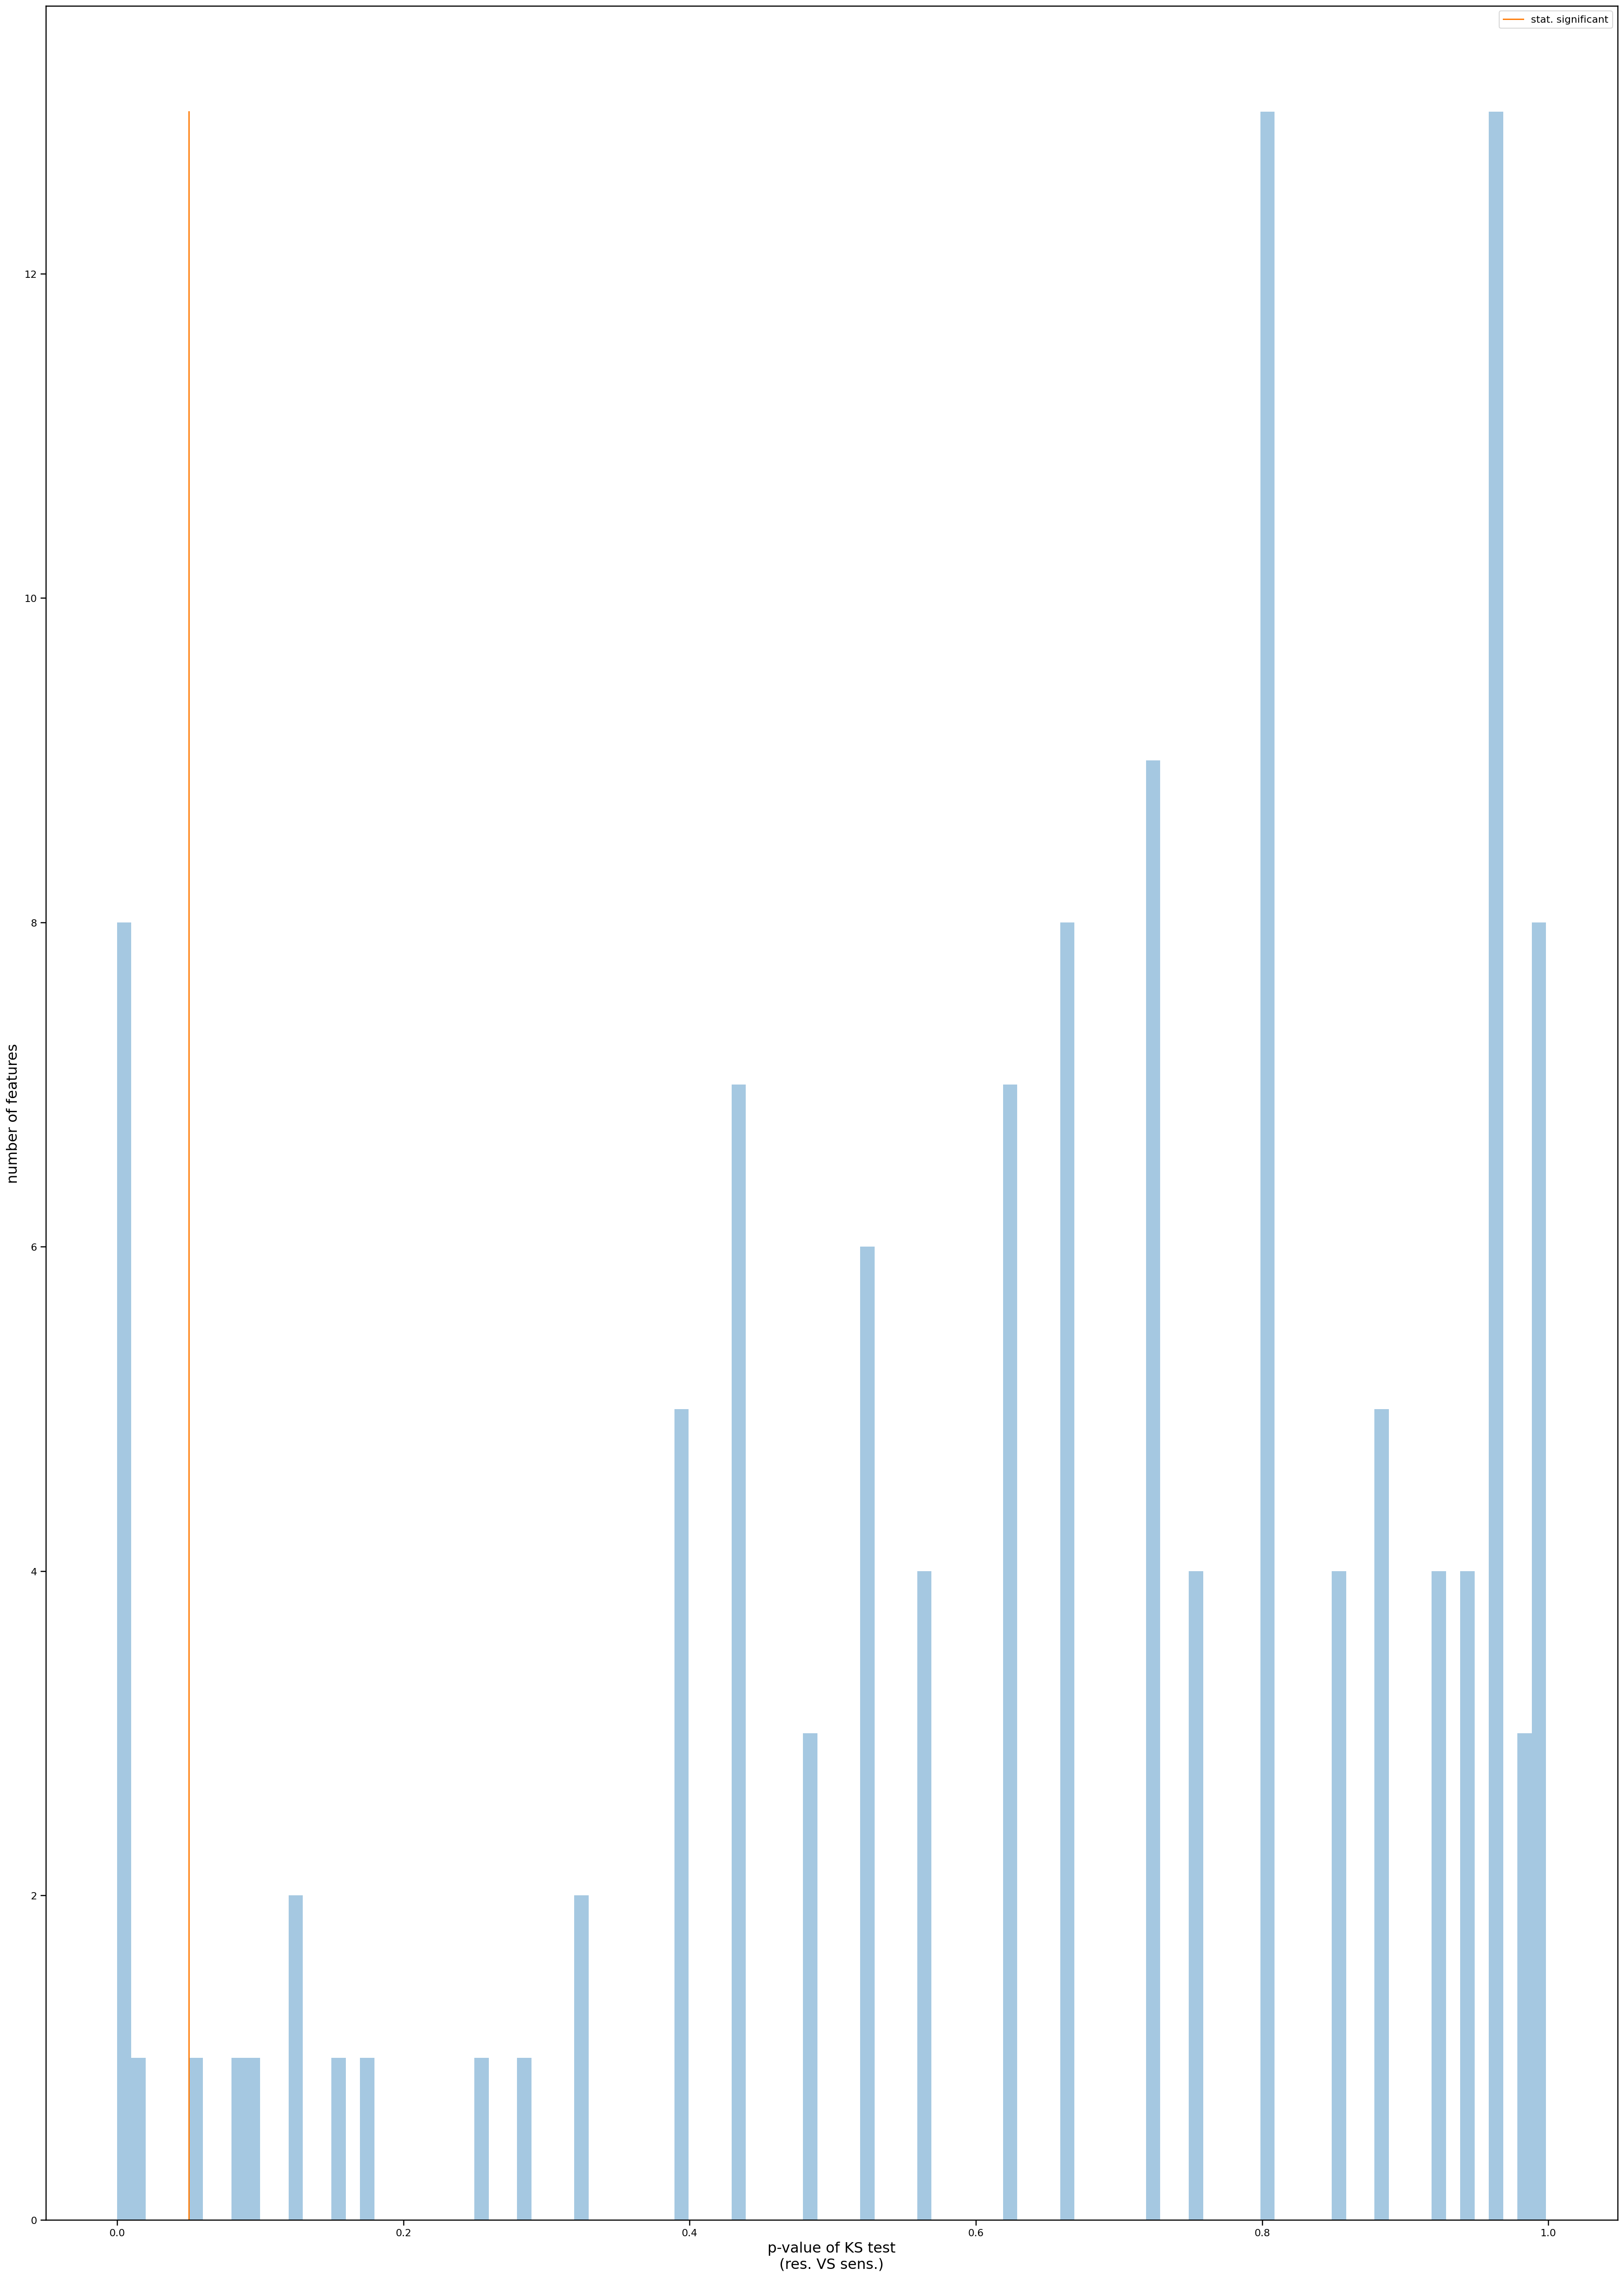

In [43]:
sns.distplot(list(ks_test.values()),kde=False,bins=100)
plt.plot((0.05,0.05),(0,13),label='stat. significant')

plt.legend()
plt.xlabel('p-value of KS test\n(res. VS sens.)',size=16)
plt.ylabel('number of features',size=16);

plt.tight_layout()
plt.savefig('./plots_exploratory/distributions_KS_pvalues.pdf')

here we print only the statistically significant:

In [44]:
ks_test = pd.Series(ks_test)
ks_test[ks_test < 0.05]

Eotaxin ser    0.005563
ITAC ser       0.010155
MCP1 ser       0.000917
MIG ser        0.002885
MIP1a ser      0.000307
MIP1b ser      0.001840
MIP3a ser      0.003576
PFS days       0.000003
PFS months     0.000003
dtype: float64

##  t-test: resistant VS non-res

mind that t-test doesn't make sense because it 
[assumes normality!](https://en.wikipedia.org/wiki/Welch%27s_t-test) -
even with different variances

In [45]:
t_test = {}

for col in ovarian_df_cleaned.columns.difference(['patient','tumor_type']):
    
    #  we ONLY save the p-value!
    t_test[col] = stats.ttest_ind(ovarian_df_cleaned.loc[ovarian_df_cleaned.tumor_type=='sensitive',col].dropna(),
                                  ovarian_df_cleaned.loc[ovarian_df_cleaned.tumor_type=='resistant',col].dropna())[1]

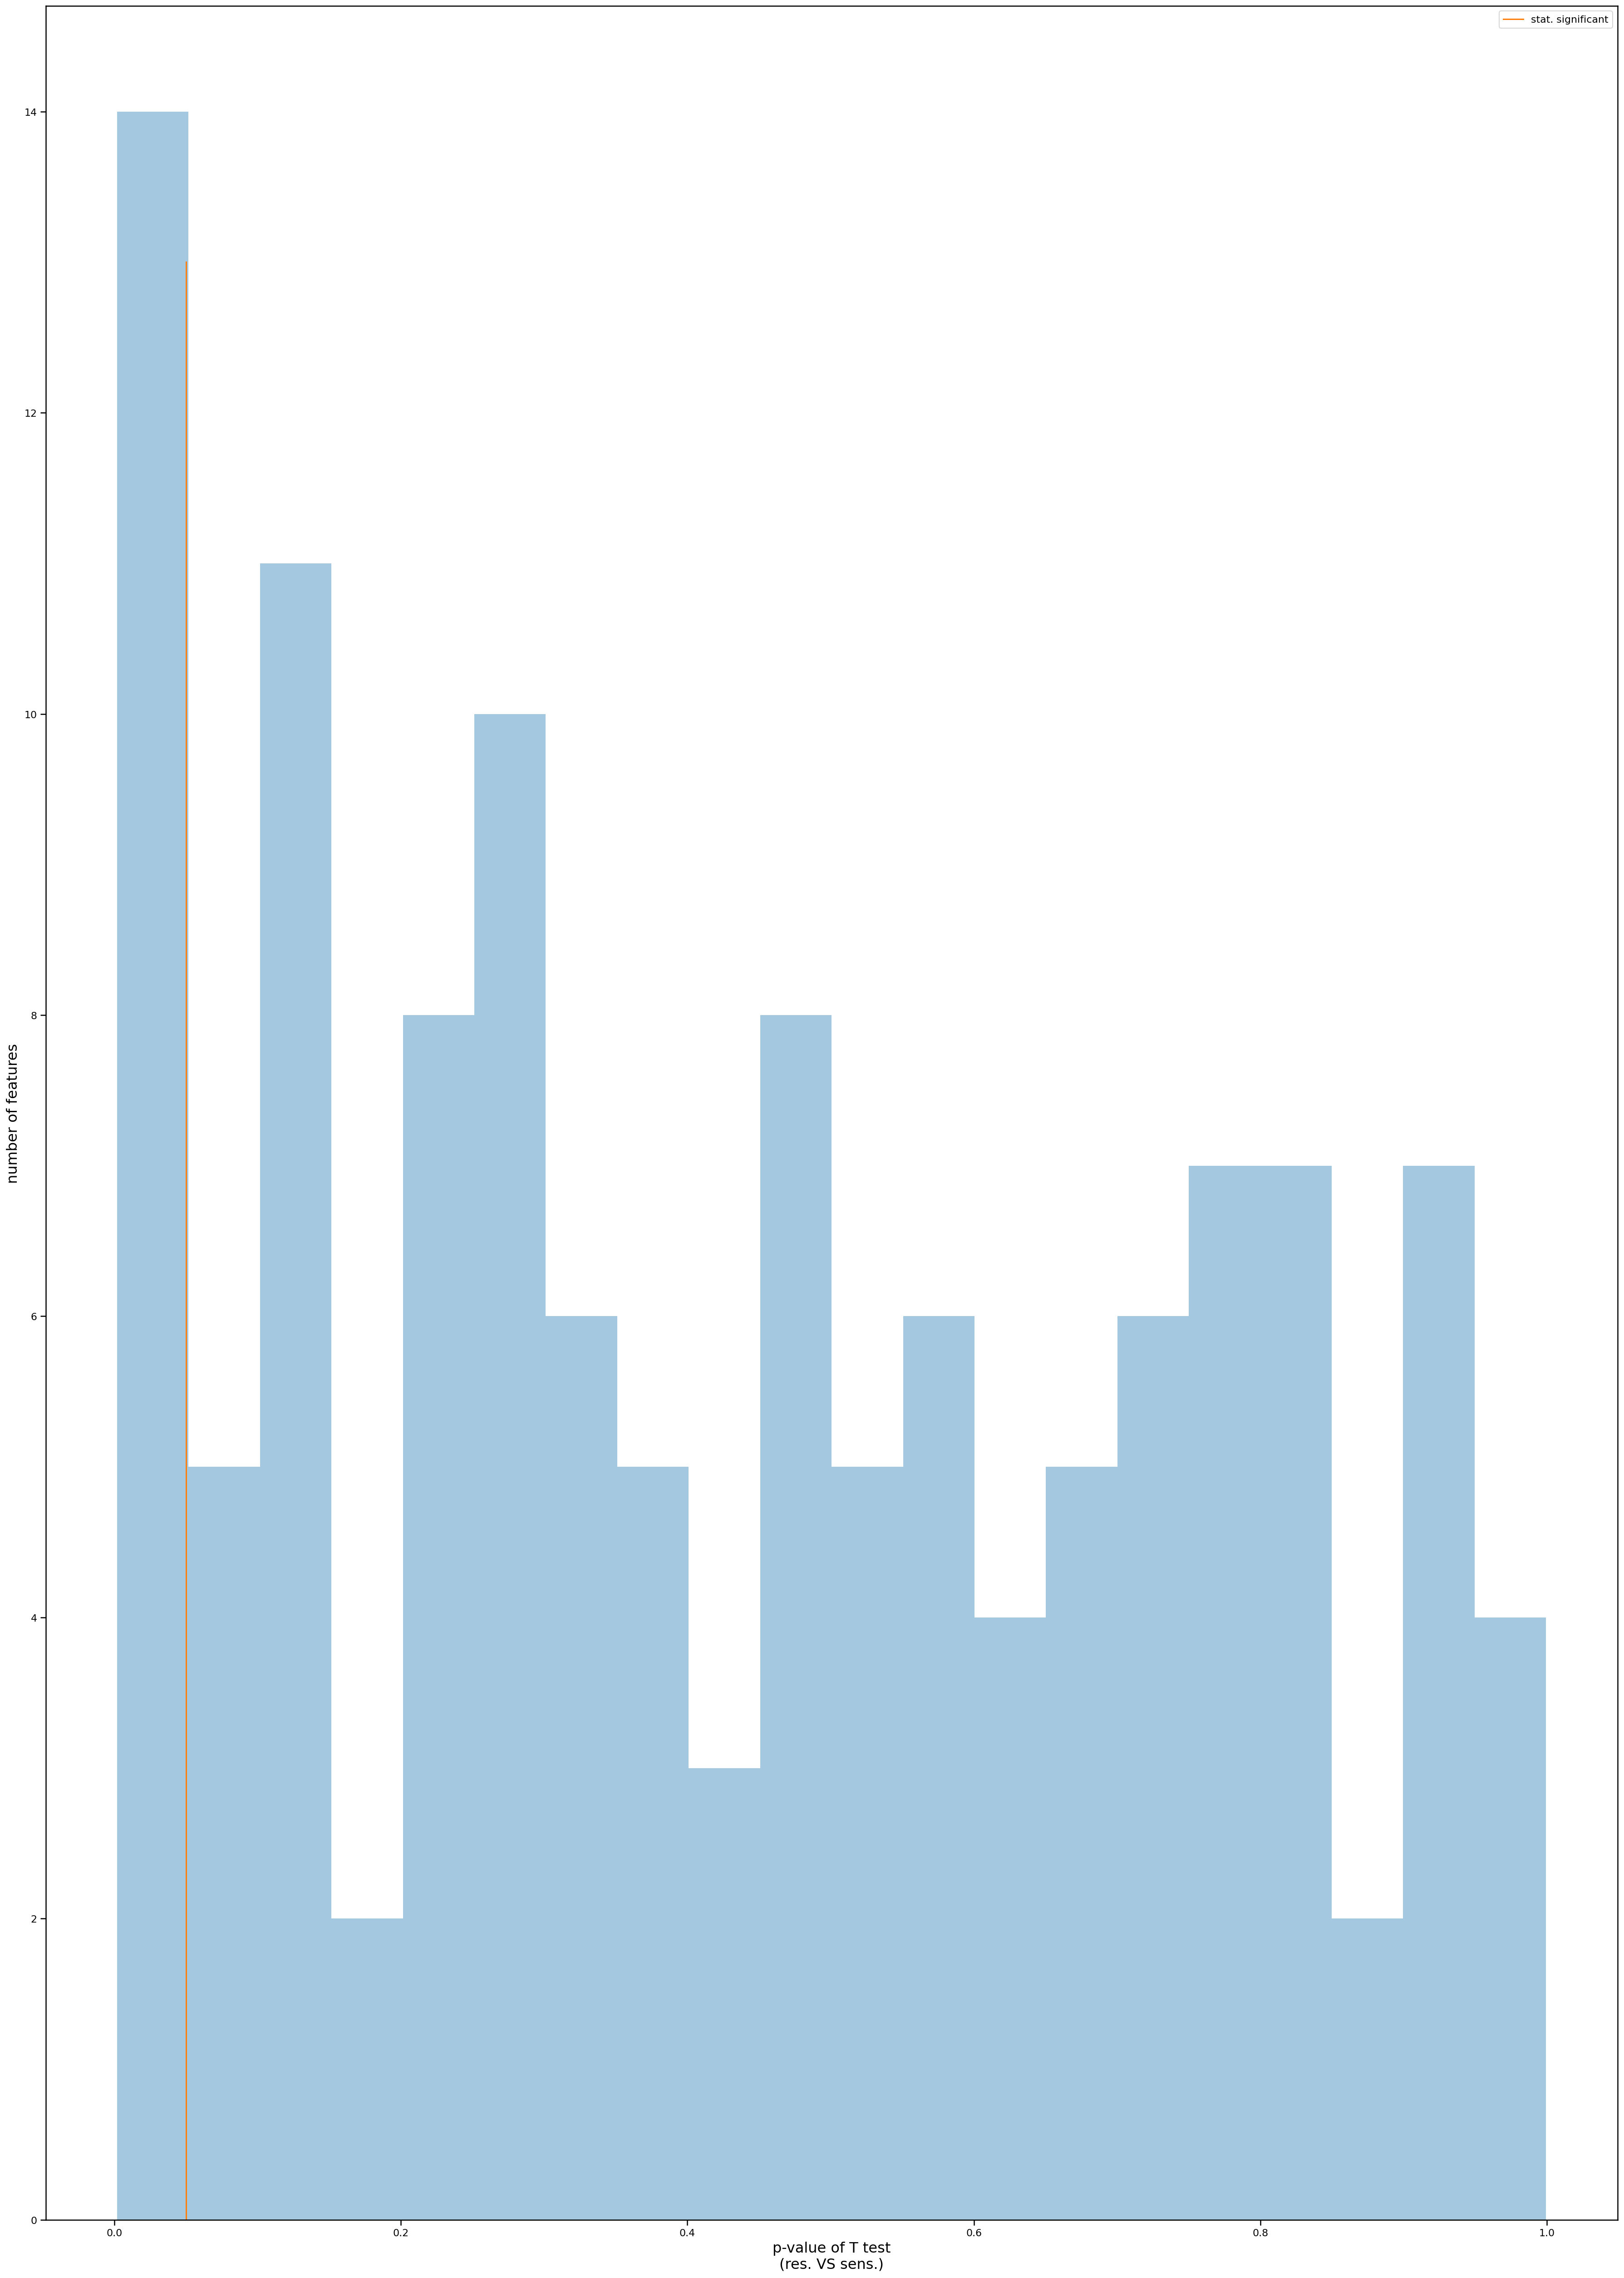

In [46]:
sns.distplot(pd.Series(list(t_test.values())).dropna(),kde=False,bins=20)
plt.plot((0.05,0.05),(0,13),label='stat. significant')

plt.legend()
plt.xlabel('p-value of T test\n(res. VS sens.)',size=16)
plt.ylabel('number of features',size=16);

plt.tight_layout()
# plt.savefig('./plots_exploratory/distributions_TT_pvalues.pdf')

In [47]:
t_test = pd.Series(t_test)
t_test[t_test < 0.05]

ABCC10        0.038395
ITAC ser      0.004978
MCP1 ser      0.007287
MHCII         0.032906
MIG lys       0.016744
MIG ser       0.031022
MIP1a ser     0.001900
MIP1b ser     0.017154
NO mig        0.028234
Oct 3-4       0.046664
PFS days      0.018170
PFS months    0.012789
dtype: float64

## plot relevant differences

prepare stat. rel. features

In [48]:
ks_test[ks_test < 0.05]

Eotaxin ser    0.005563
ITAC ser       0.010155
MCP1 ser       0.000917
MIG ser        0.002885
MIP1a ser      0.000307
MIP1b ser      0.001840
MIP3a ser      0.003576
PFS days       0.000003
PFS months     0.000003
dtype: float64

In [49]:
t_test[t_test < 0.05]

ABCC10        0.038395
ITAC ser      0.004978
MCP1 ser      0.007287
MHCII         0.032906
MIG lys       0.016744
MIG ser       0.031022
MIP1a ser     0.001900
MIP1b ser     0.017154
NO mig        0.028234
Oct 3-4       0.046664
PFS days      0.018170
PFS months    0.012789
dtype: float64

spot out differences! between two tests

In [50]:
[print(marker,ks_test[marker]) for marker in t_test[t_test < 0.05].keys() if ks_test[marker] > 0.05];

ABCC10 0.7201000406874938
MHCII 0.622384951003884
MIG lys 0.12021023622223748
NO mig 0.3200823180353931
Oct 3-4 0.7201000406874938


In [51]:
[print(marker,t_test[marker]) for marker in ks_test[ks_test < 0.05].keys() if t_test[marker] > 0.05];

Eotaxin ser 0.12302243959734359
MIP3a ser 0.8423308197996302


plotting

In [52]:
stat_relev_feats = list(t_test[t_test < 0.05].keys())
# stat_relev_feats = list(ks_test[ks_test < 0.05].keys())

add `patient`,`tumor_type`:

In [53]:
stat_relev_feats.append('patient')
stat_relev_feats.append('tumor_type')

reshape the dataframe with 
[melt](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-melt)!

In [54]:
df_for_plot = pd.melt(ovarian_df_cleaned[stat_relev_feats],
                      id_vars=['patient', 'tumor_type'],
                      var_name='biomarker')

here we check indeed the _right dimension of the new df_ ;)

In [55]:
ovarian_df_cleaned.shape[0] * (len(stat_relev_feats) - 2)

432

In [56]:
print(df_for_plot.shape)
df_for_plot.head()

(432, 4)


,patient,tumor_type,biomarker,value
0,8,sensitive,ABCC10,6.80
1,12,sensitive,ABCC10,NaN
2,18,sensitive,ABCC10,8.64
3,20,sensitive,ABCC10,5.19
4,27,sensitive,ABCC10,11.04


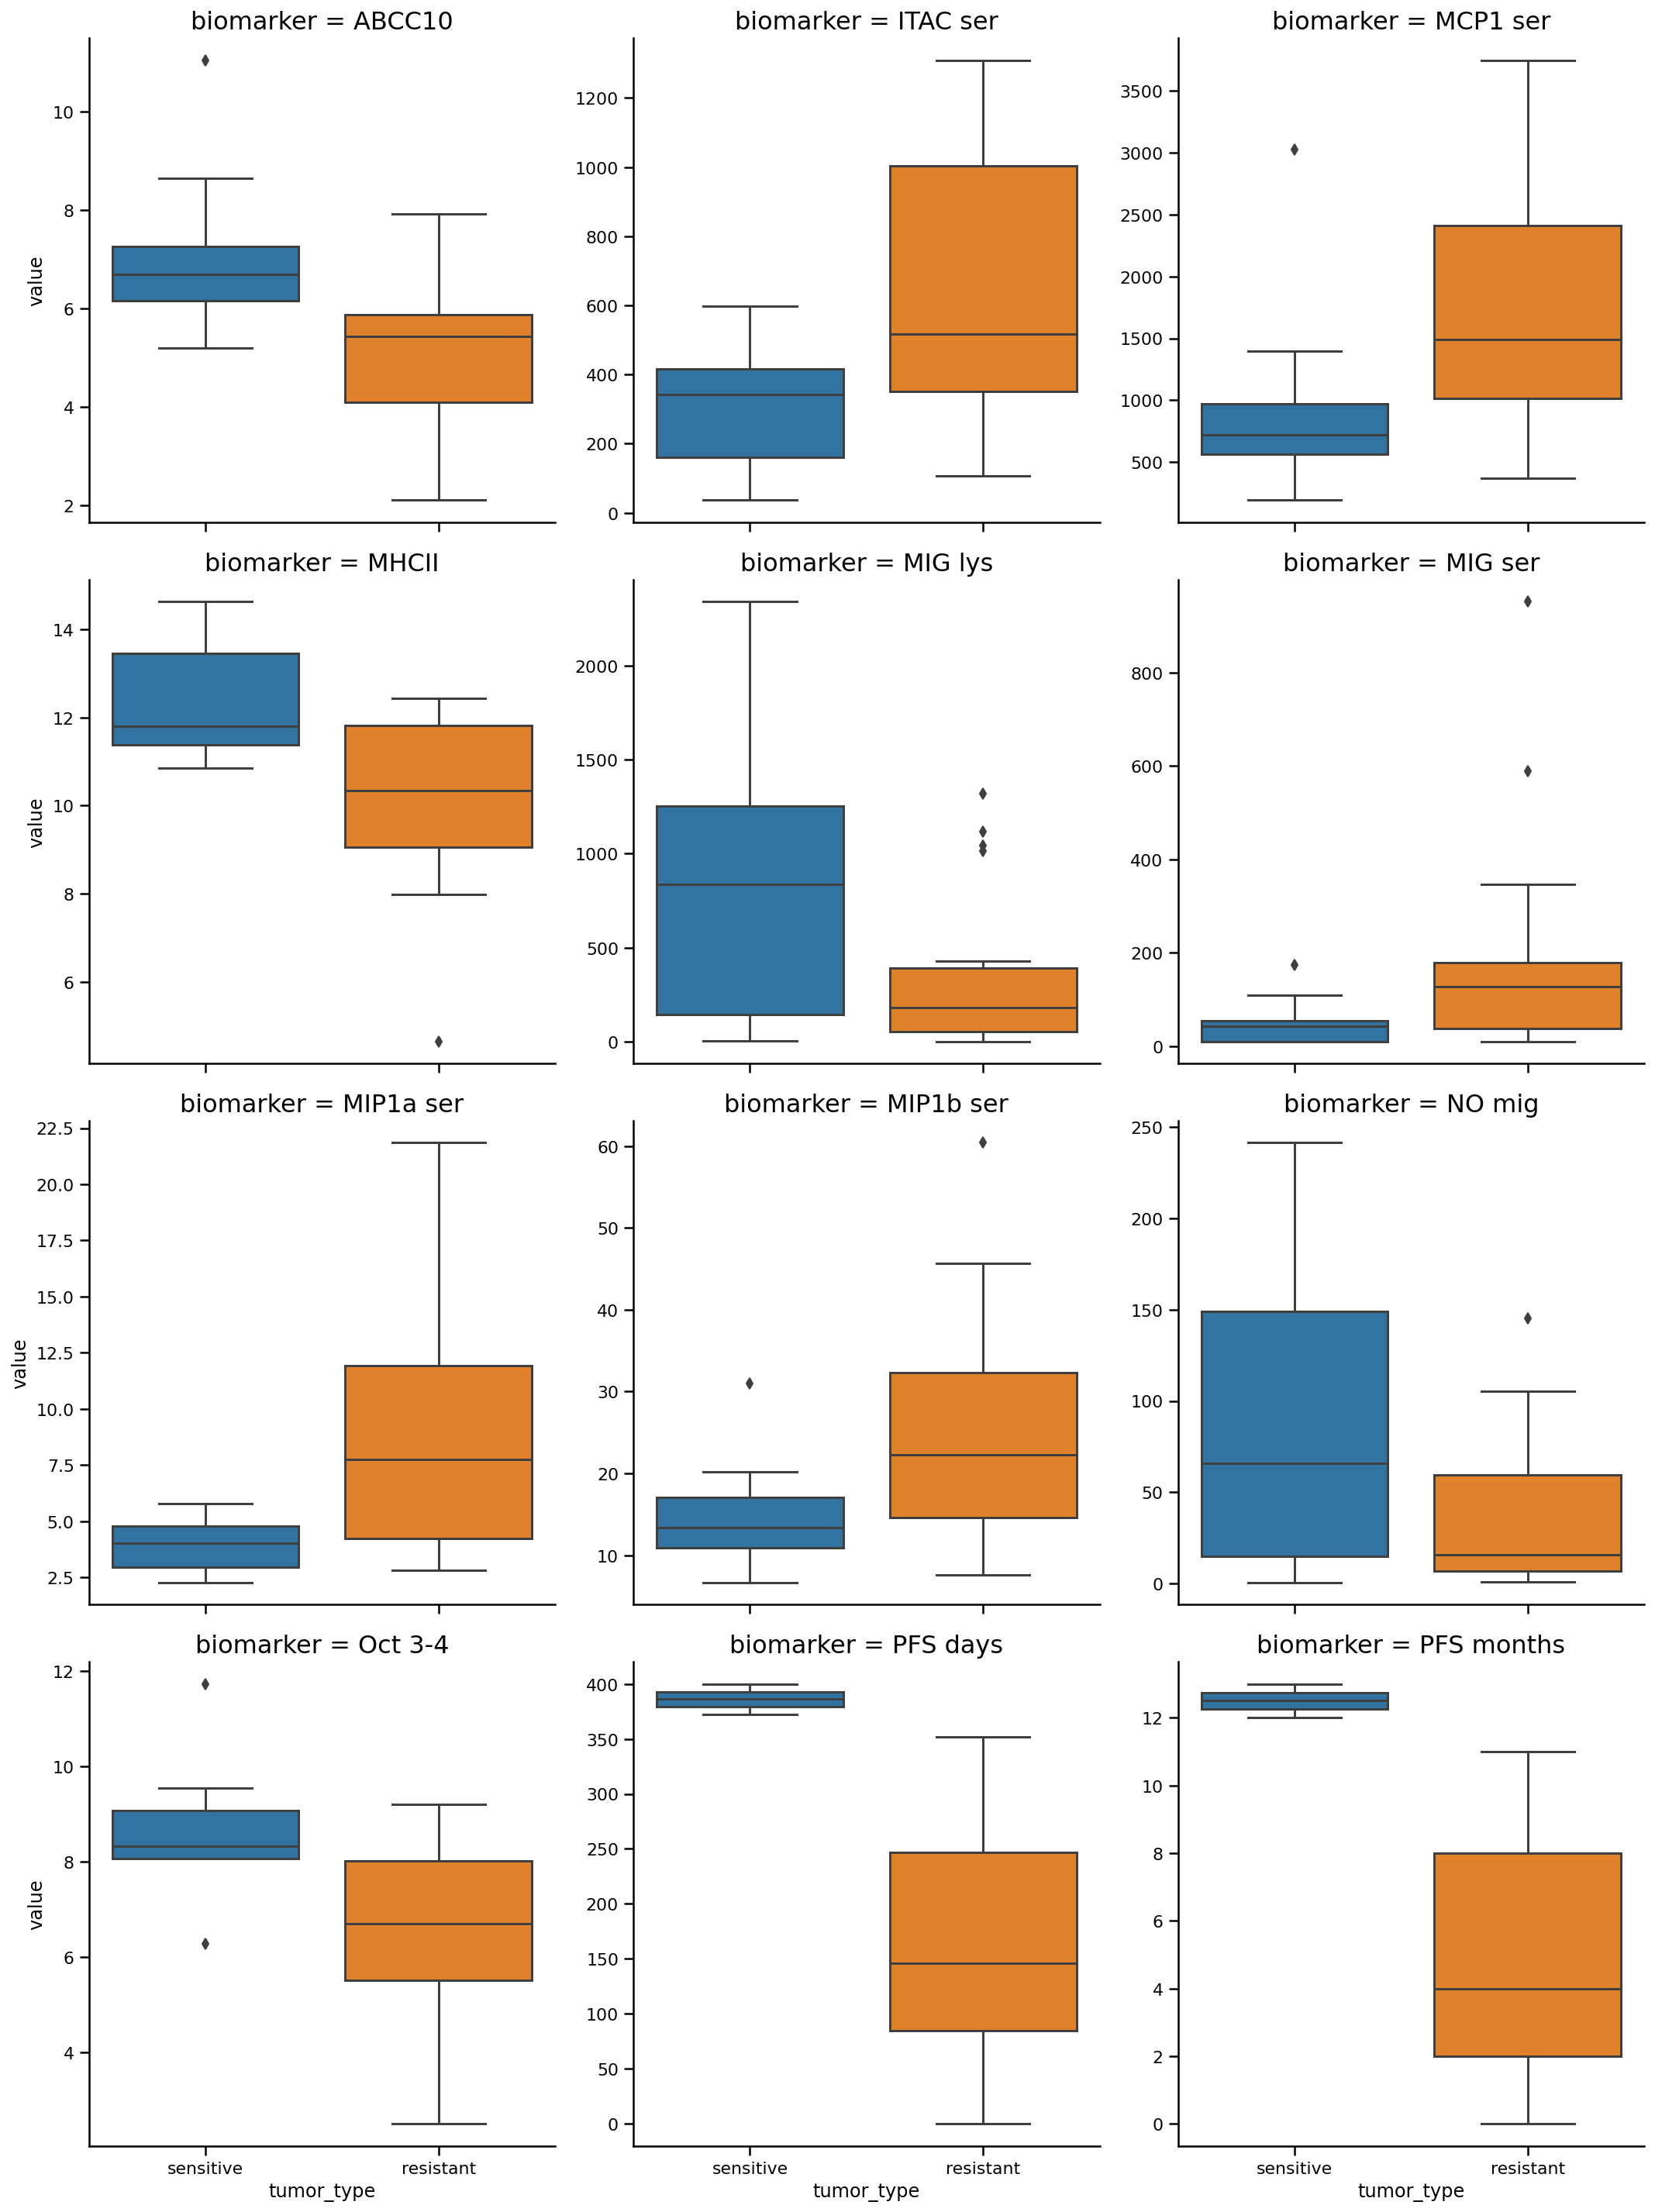

In [58]:
# plt.rcParams["figure.figsize"] = [15,5]
dist_plot = sns.catplot(data=df_for_plot.dropna(),
                        y='value',
                        x='tumor_type',
                        kind='box',
                        col='biomarker',
                        col_wrap=3,
                        sharey=False)

dist_plot.set_titles(size=16)
# dist_plot.set_axis_labels('')

plt.tight_layout()
plt.savefig('./plots_exploratory/t_test_stat_sign_feats.pdf')
# plt.savefig('./plots_exploratory/ks_test_stat_sign_feats.pdf')

other markers found by the biologist as significant

In [59]:
[
    print(marker, ks_test[marker]) for marker in
    ['IFNg SER CBA', 'IFNG LYS CBA', 'IFN Lys normalized to conc']
    if marker in ks_test.keys()
];

IFNg SER CBA 0.05818849279575056
IFNG LYS CBA 0.9403128692683157
IFN Lys normalized to conc 0.4374420920182196


In [60]:
[
    print(marker, t_test[marker]) for marker in
    ['IFNg SER CBA', 'IFNG LYS CBA', 'IFN Lys normalized to conc']
    if marker in t_test.keys()
];

IFNg SER CBA 0.05158767504609459
IFNG LYS CBA 0.7075520945928877
IFN Lys normalized to conc 0.9458977234003538
